# Network X
---


### Useful tutorials and workflows
- [github workflow](https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/00-Network-Analysis.html)

- [NetworkX website tutorial](https://networkx.org/documentation/latest/tutorial.html)

- [Vis methods](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259)

- [more examples and doc](https://networkx.org/documentation/stable/auto_examples/basic/plot_read_write.html)


## Setup

In [1]:
import os
import pandas as pd
import numpy as np
import get_data 
import get_patient
import get_PPI
from binarised import UC_bin_97_5, CD_bin_97_5, CD_bin_99, UC_bin_99, CD_bin_95, UC_bin_95
from get_data import genepy_df
import networkx as nx
import get_network_analysis
import matplotlib.pyplot as plt
import seaborn as sns

## individual networks

In [ ]:
patient_df = pd.read_csv('patient_networks/CD_97_5_network/patient_0.txt', sep='\t',header=None, names=['source','target','score'])
patient_df

In [19]:
directory = 'patient_networks/CD_97_5_network/'
os.listdir(directory)

def create_patient_networkX(file):
    patient_name = os.path.splitext(test)[0].split('_')[1]
    return nx.read_edgelist(file, data =[('Weight', float)])

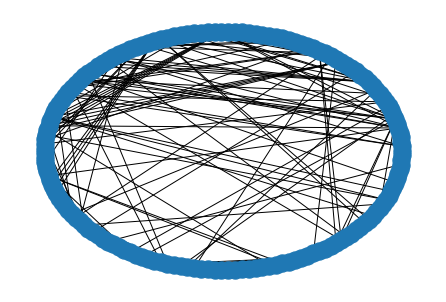

In [32]:
g1 = create_patient_networkX(directory+'patient_AP0013.txt')
nx.draw_circular(g1)

In [15]:
test = 'patient_ap001.txt'

pname = os.path.splitext(test)[0].split('_')[1]
pname

'ap001'

---
Now use functions in `get_network_analysis` to select individual graphs

## Multigraph

In [21]:
multi = multiple_graph(directory=directory)

--- 
Now use graph list

## Total Node degree

In [31]:
def node_degree(multigraph):
    dic = dict(multigraph.degree(list(multigraph.nodes)))
    return pd.Series(data=dic).sort_values(ascending=False)


In [4]:
directories = os.listdir("patient_networks/")

networks = [x for x in directories if "network" in x]
networks

['UC_99_network',
 'CD_99_network',
 'UC_97_5_network',
 'CD_95_network',
 'CD_97_5_network',
 'UC_95_network']

In [3]:
import get_network_analysis

directories = os.listdir("patient_networks/")
networks = [x for x in directories if "network" in x]

for directory in networks:
    series = get_network_analysis.get_total_degree("patient_networks/"+directory+"/")
    print(series)

GAPDH     175
UBA52     157
ASPM      115
IL6       103
GNG13      89
         ... 
GSKIP       1
SEL1L3      1
CLVS1       1
HTRA2       1
PRDM13      1
Length: 11540, dtype: int64
EGF          155
GAPDH        120
UBA52        113
EEF2         112
HNRNPA2B1     95
            ... 
MKNK1          1
SLPI           1
TMX4           1
PIFO           1
MFSD11         1
Length: 13392, dtype: int64


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 79: invalid start byte

In [42]:
get_network_analysis.get_total_degree("patient_networks/UC_97_5_network/").head(30)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 79: invalid start byte

In [16]:
directory = "patient_networks/CD_97_5_network/"

In [11]:
def create_multiple_graph(directory):

    G = nx.MultiGraph()
    list2 = [f for f in os.listdir(directory) if not f.startswith('.')]
    for file in list2:
        patient_edge = nx.read_weighted_edgelist(directory+file, 
                                                 delimiter = "\t",
                                                 encoding='utf-8'
                                                )
        G.add_edges_from(patient_edge.edges, **patient)
    return G

In [17]:
import get_network_analysis

get_network_analysis.get_total_degree(directory).head(30)

GAPDH       368
ALB         355
EGFR        352
CTNNB1      343
AKT1        343
EP300       317
BRCA1       300
CREBBP      298
EGF         295
NOTCH1      294
GNB1        286
FN1         274
ERBB2       264
PTPRC       263
ACTB        258
JUN         257
EEF2        251
PRKACA      245
UBA52       245
HSPA4       242
CDH1        241
HIF1A       238
ATM         232
TOP2A       228
APP         226
HSPA8       223
XPO1        220
PIK3R1      219
CD4         217
HSP90AA1    216
dtype: int64

## Distrubution of node degree

In [31]:
directory1 = "patient_networks/UC_99_network/"

def create_graph_list(directory):
    Glist = []
    for file in os.listdir(directory):
        patient_edge = nx.read_weighted_edgelist(directory+file,
                                                delimiter = "\t",
                                                encoding='utf-8')
        Glist.append(patient_edge)
    return Glist
    

In [8]:
directory1 = "patient_networks/UC_99_network/"
UC_99_Glist = get_network_analysis.create_graph_list(directory1)

In [46]:
pd.Series(data = [val for (node, val) in UC_99_Glist[0].degree()],
          index = [node for (node, val) in UC_99_Glist[0].degree()])

RALBP1    1
HSF1      2
KCNQ1     1
KCNE1L    1
ACOT8     2
         ..
CSTF2     3
ACBD4     1
ZBTB44    1
NBEAL1    1
BRAP      1
Length: 74, dtype: int64

In [40]:
df_degree = pd.DataFrame(dtype='int64', index=UC_bin_99.columns)
for graph in UC_99_Glist:
    GSeries = pd.Series(data = [val for (node, val) in graph.degree()],
                        index = [node for (node, val) in graph.degree()],
                        name = graph.name,
                        dtype = 'int64')
    df_degree = pd.concat([df_degree, GSeries], axis=1)
    

In [152]:
df_degree = pd.DataFrame(index=UC_bin_99.columns)
for graph in UC_99_Glist:
    GSeries = pd.Series(data = [val for (node, val) in graph.degree()],
                        index = [node for (node, val) in graph.degree()])
    df_degree = pd.concat([df_degree, GSeries], axis=1, ignore_index=True)

In [ ]:
df_degree = df_degree.fillna(0)
df_degree_T = df_degree.T

<AxesSubplot:>

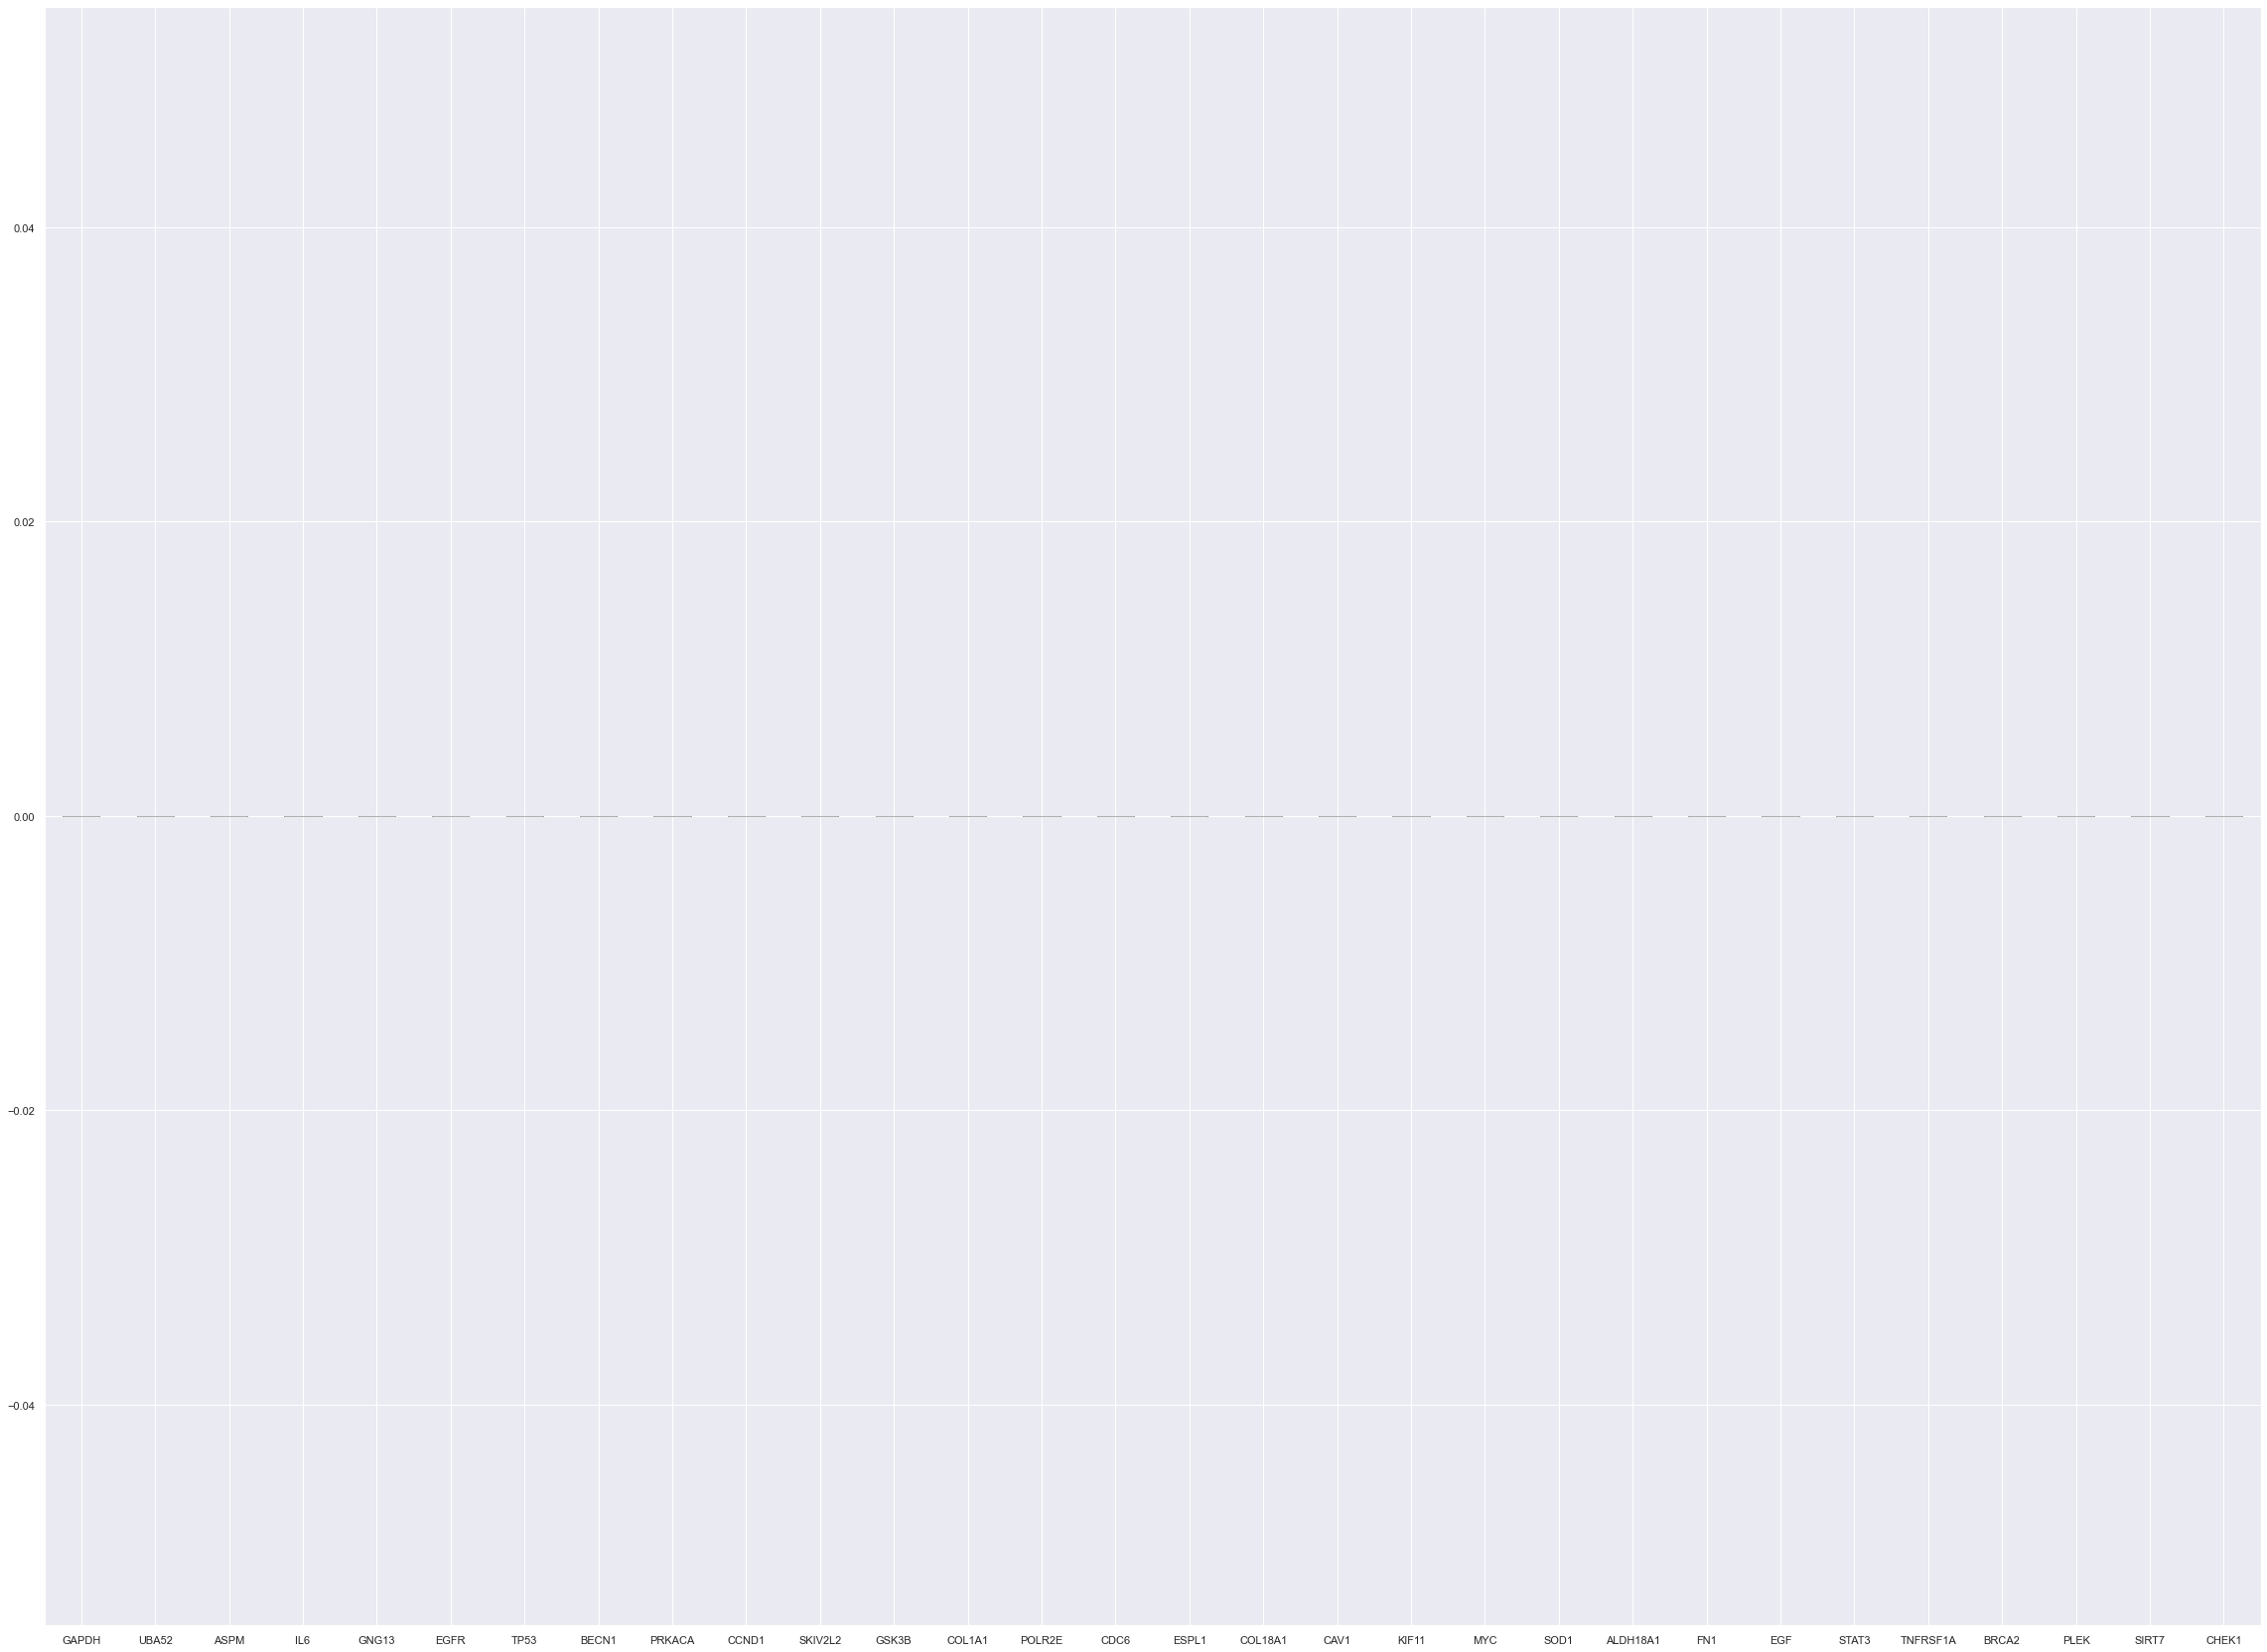

In [ ]:
top_connected = df_degree_T.sum().sort_values(ascending=False).head(30).index
df_degree_T[top_connected].boxplot(showfliers=False)


In [191]:
nx.info(UC_99_Glist[2])

'Graph with 45 nodes and 44 edges'

In [22]:
UC_99_multiG = get_network_analysis.create_multiple_graph("patient_networks/UC_99_network/")

In [128]:
UC_bin = UC_bin_99.sum().sort_values(ascending=False)
UC_bin["C2orf78"]

8

In [3]:
directory1 = 'patient_networks/UC_99_network/'


In [7]:
for file in os.listdir(directory1):
    G = nx.Graph(name=file.split(".")[0])
    interactions = nx.read_weighted_edgelist(directory1+file,
                                             delimiter = "\t",
                                             encoding='utf-8',
                                            name=)
    interactions = np.array(interactions)
    

In [15]:
g = nx.read_weighted_edgelist(directory1+'AP0045.txt',
                              delimiter = "\t",
                              encoding='utf-8',
                              )
g = nx.Graph(incoming_graph_data=g, name = 'AP0045')

TypeError: read_weighted_edgelist() got an unexpected keyword argument 'name'

In [4]:
Glizzo = get_network_analysis.create_graph_list(directory1)

In [3]:
def get_node_degree_df(graph_list):
    df_degree = pd.DataFrame(dtype='int64')
    for graph in graph_list:
        GSeries = pd.Series(data = [val for (node, val) in graph.degree()],
                            index = [node for (node, val) in graph.degree()],
                            name = graph.name,
                            dtype = 'int64')
        df_degree = pd.concat([df_degree, GSeries], axis=1)
    df_degree = df_degree.fillna(0).T
    return df_degree

In [18]:
Glist_99 = get_network_analysis.create_graph_list_from_df(UC_bin_99)

In [15]:
degree_df = get_node_degree_df(Glist_99)

In [19]:
degree_df["C2orf78"]

AP0045      0.0
AP0046      0.0
AP0065      0.0
AP0088      0.0
AP0127      0.0
           ... 
SORL0036    0.0
SORL0037    0.0
SORL0038    0.0
SORL0040    0.0
SORL0041    0.0
Name: C2orf78, Length: 368, dtype: float64

In [24]:
UC_bin = UC_bin_99.sum().sort_values(ascending=False).head(50).index

In [25]:
UC_bin

Index(['DIXDC1', 'CEP192', 'ING1', 'WDR55', 'PRR14', 'NIN', 'ZDHHC24',
       'CYP4F11', 'KLHDC4', 'TEX10', 'HEATR5A', 'TPMT', 'ZBTB14', 'HCN1',
       'ADAM29', 'DZIP3', 'FGB', 'SPINT2', 'FANCA', 'ABLIM1', 'PELI2',
       'AGPAT3', 'PIGV', 'PMFBP1', 'CYP2C18', 'C2orf78', 'ADA', 'OCSTAMP',
       'CELF5', 'TSC1', 'CCDC112', 'FOXO4', 'GLTPD2', 'NNT', 'GXYLT2',
       'IL17RD', 'FADS6', 'SYNJ1', 'PPP1R12C', 'PAK5', 'NGRN', 'GDAP1L1',
       'MSLN', 'PAX3', 'ZFAND3', 'UNK', 'UCP1', 'EMCN', 'IRX4', 'TAF1L'],
      dtype='object')

## Node Degree Distrubution
---
Boxplots for node degree distrubtion

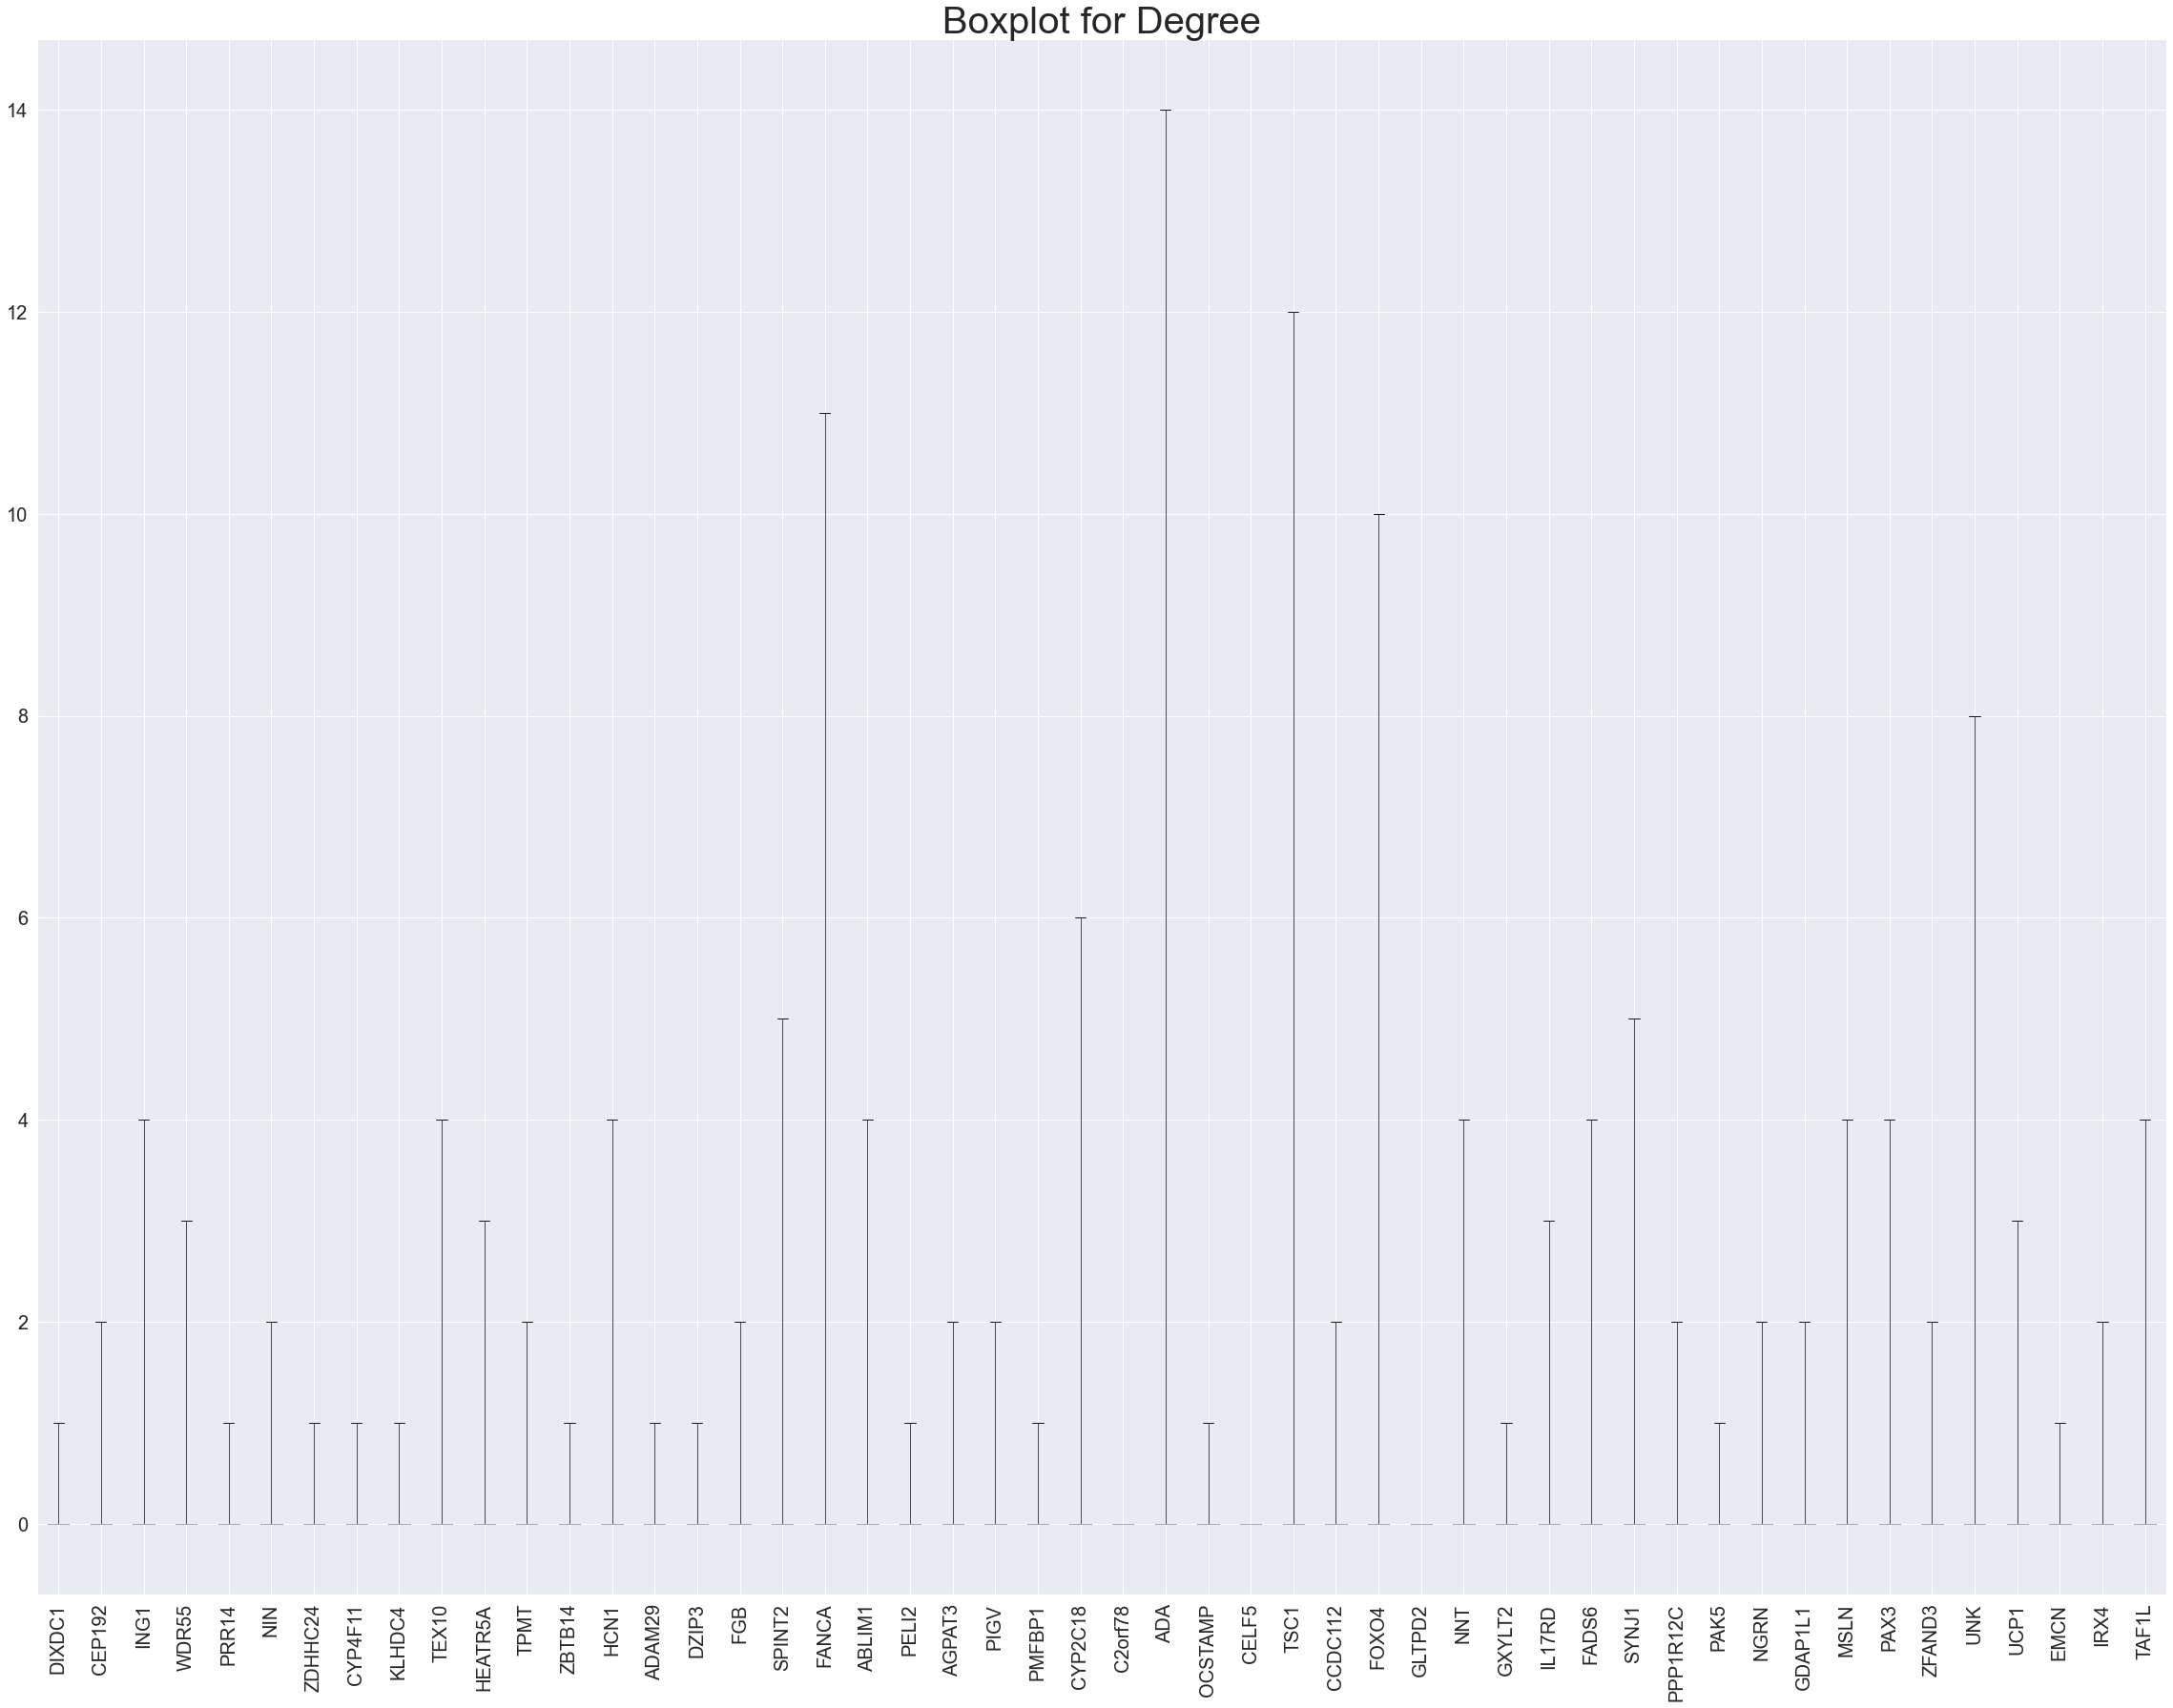

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc = {'figure.figsize':(40,30)})
boxCD = degree_df[UC_bin].boxplot(whis=(0, 100))
boxCD.tick_params(axis='x',
                  labelrotation=90)
boxCD.tick_params(labelsize=20)
boxCD.set_title('Boxplot for Degree UC 99',
                size=40)
plt.show(boxCD)

In [16]:
def create_boxplot(data, subset, name, save=False):
    sns.set(rc = {'figure.figsize':(40,30)})
    degree_boxplot = data[subset].boxplot(whis=(0, 100))
    degree_boxplot.tick_params(axis='x',
                               labelrotation=90)
    degree_boxplot.tick_params(labelsize=20)
    degree_boxplot.set_title('Boxplot for distrubution of node degree in ' +name,
                             size=40)
    if save == False:
        pass
    else: 
        degree_boxplot.figure.savefig(name+".png")
    return plt.show(degree_boxplot)

In [23]:
def get_top_genes(data, head=50):
    return data.sum().sort_values(ascending=False).head(head).index

In [37]:
get_top_50_genes(CD_bin_99)

Index(['A1BG', 'TTLL10', 'TPGS1', 'TNIK', 'ARMC5', 'EIF2AK4', 'ASB6', 'TECTA',
       'DRP2', 'MAML1', 'DLD', 'MIR4293', 'MN1', 'SLITRK1', 'CSRNP2',
       'SLC25A26', 'SLAIN1', 'OR4X1', 'PAN3', 'ACCSL', 'PDZD7', 'PHLPP1',
       'ZNF35', 'RGMB', 'CFAP69', 'ZNF470', 'POMGNT1', 'TRIM62', 'MTFMT',
       'HDAC7', 'GIMD1', 'FIBCD1', 'WRNIP1', 'HOMER1', 'CALHM3', 'C5orf46',
       'SETX', 'SERPINB2', 'CACNA1E', 'SEMA6B', 'SDCBP2', 'VAV1', 'AKR1C3',
       'CAMSAP1', 'CAPN10', 'SBK2', 'CASKIN2', 'C2orf73', 'C2orf42', 'SIRT3'],
      dtype='object')

In [29]:
create_boxplot(degree_df,UC_bin, "UC 99", save=True)

NameError: name 'degree_df' is not defined

In [ ]:
UC_bin_97_5.

In [26]:
UC_99_top = get_top_genes(UC_bin_99)
UC_97_top = get_top_genes(UC_bin_97_5)
UC_95_top = get_top_genes(UC_bin_95)

CD_99_top = get_top_genes(CD_bin_99)
CD_97_top = get_top_genes(CD_bin_97_5)
CD_95_top = get_top_genes(CD_bin_95)

In [ ]:
CD_95_top_degree = get_top_50_genes(CD_95_node_df)
UC_95_top_degree = get_top_50_genes(UC_95_gl_node_df)

CD_95_top_degree

In [13]:
directory = "patient_networks/"
folderlist = [f for f in os.listdir(directory) if not f.startswith('.')]
folderlist = [x for x in folderlist if "network_2" in x]
folderlist

['UC_97_5_network_2',
 'CD_95_network_2',
 'CD_97_5_network_2',
 'UC_95_network_2',
 'CD_99_network_2',
 'UC_99_network_2']

In [10]:
directory = "patient_networks/"

UC_99_gl = get_network_analysis.create_graph_list_from_directory(directory+"UC_99_network_3/")
UC_97_5_gl = get_network_analysis.create_graph_list_from_directory(directory+"UC_97_5_network_3/")
UC_95_gl = get_network_analysis.create_graph_list_from_directory(directory+"UC_95_network_3/")

CD_99_gl = get_network_analysis.create_graph_list_from_directory(directory+"CD_99_network_3/")
CD_97_5_gl = get_network_analysis.create_graph_list_from_directory(directory+"CD_97_5_network_3/")
CD_95_gl = get_network_analysis.create_graph_list_from_directory(directory+"CD_95_network_3/")

In [11]:
UC_99_node_df = get_network_analysis.get_node_degree_df(UC_99_gl)
UC_97_5_node_df = get_network_analysis.get_node_degree_df(UC_97_5_gl)
UC_95_gl_node_df = get_network_analysis.get_node_degree_df(UC_95_gl)

CD_99_node_df = get_network_analysis.get_node_degree_df(CD_99_gl)
CD_97_5_node_df = get_network_analysis.get_node_degree_df(CD_97_5_gl)
CD_95_node_df = get_network_analysis.get_node_degree_df(CD_95_gl)

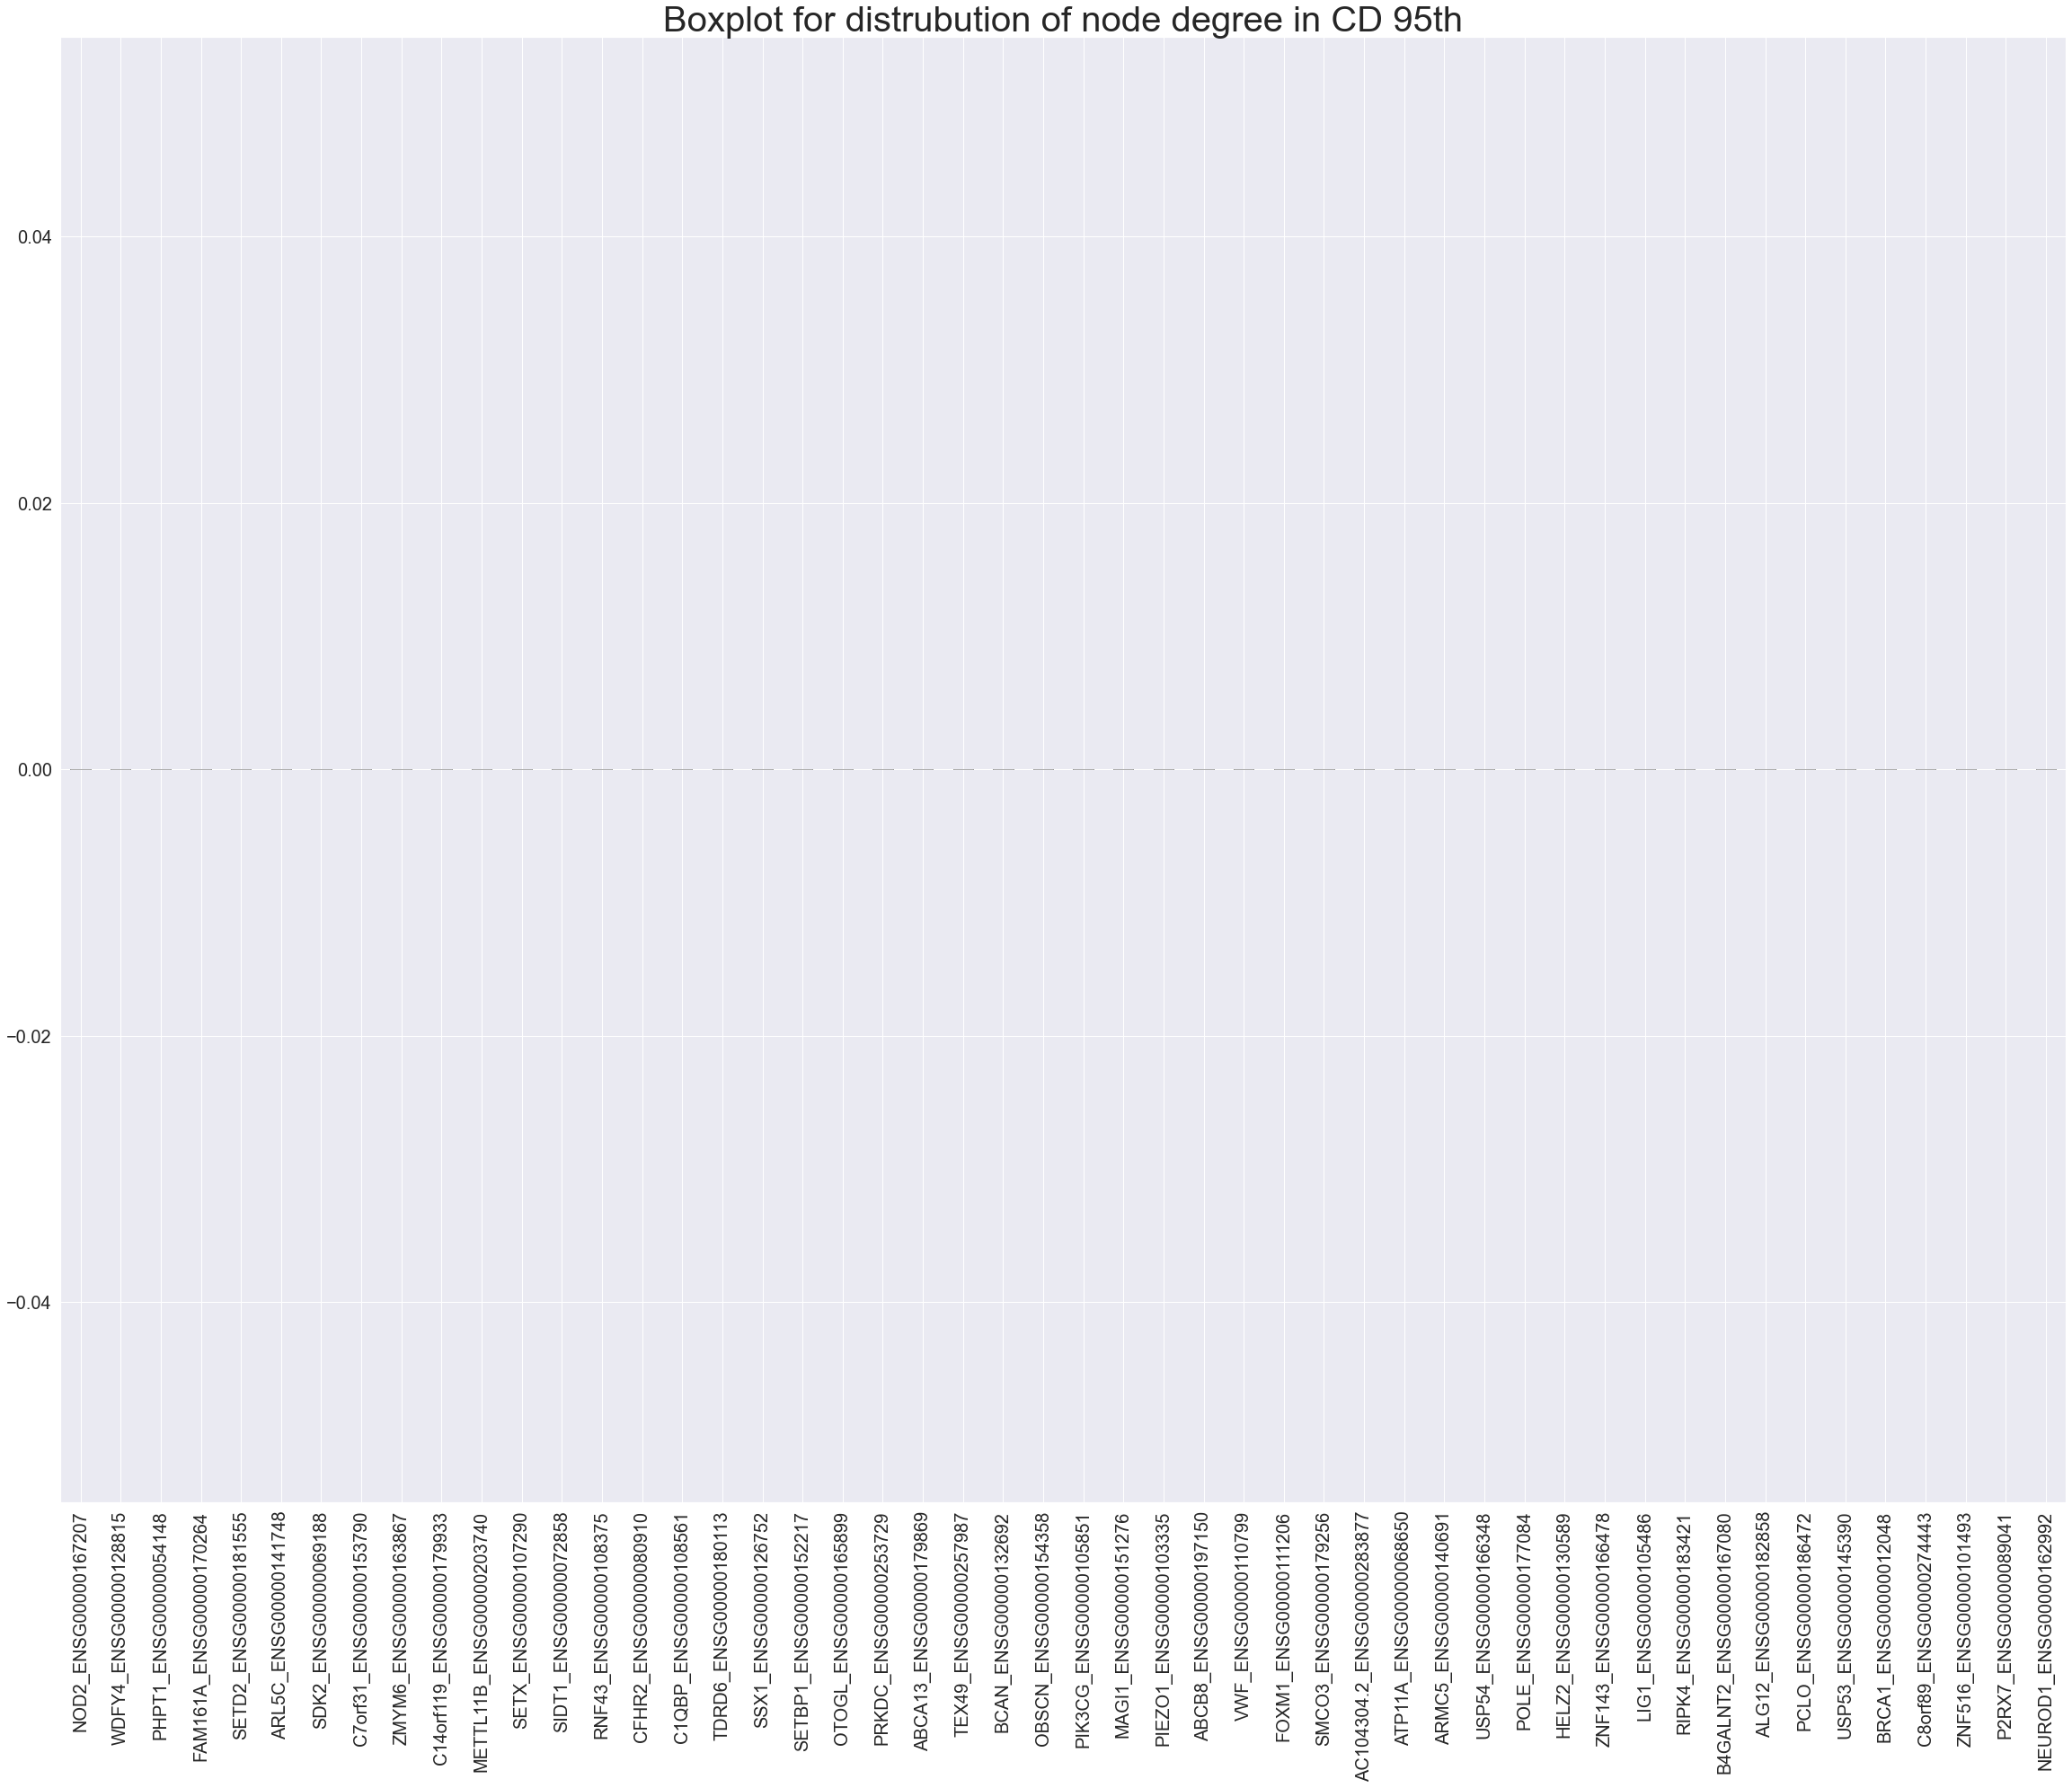

In [27]:
create_boxplot(CD_95_node_df, CD_95_top, name="CD 95th", save=False )

In [43]:
CD_95_node_df[CD_95_top][CD_95_node_df[CD_95_top]>0]

,NOD2,CFAP58,ATP7B,CRYBG2,PDZD7,CFAP44,TMPRSS6,ALG8,COL15A1,USP53,...,EGFLAM,LRRC69,TTC27,CCDC62,SORL1,CELSR3,P2RX7,CREBBP,KIF26A,ANKHD1
PR0215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PR0201,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOPR0392,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAD0499,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAD0466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOPR0360,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
PR0032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOPR0412,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
SOAD0480,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
def create_boxplot_above_zero(data, subset, name, save=False):
    sns.set(rc = {'figure.figsize':(40,30)})
    degree_boxplot = data[subset][data[subset]>0].boxplot(whis=(0, 100))
    degree_boxplot.tick_params(axis='x',
                               labelrotation=90)
    degree_boxplot.tick_params(labelsize=20)
    degree_boxplot.set_title('Boxplot for distrubution of node degree in ' +name,
                             size=40)
    if save == False:
        pass
    else: 
        degree_boxplot.figure.savefig(name+".png")
    return plt.show(degree_boxplot)

In [53]:
range(0,60,10)

range(0, 60, 10)


In [57]:
def create_boxplot_above_zero_fixed(data, subset, name, save=False):
    sns.set(rc = {'figure.figsize':(40,30)})
    degree_boxplot = data[subset][data[subset]>0].boxplot(whis=(0, 100))
    degree_boxplot.tick_params(axis='x',
                               labelrotation=90)
    degree_boxplot.tick_params(labelsize=20)
    degree_boxplot.set_yticks(ticks=range(0,71, 10))
    degree_boxplot.set_title('Boxplot for distrubution of node degree in ' +name,
                             size=40)
    if save == False:
        pass
    else: 
        degree_boxplot.figure.savefig(name+".png")
    return plt.show(degree_boxplot)

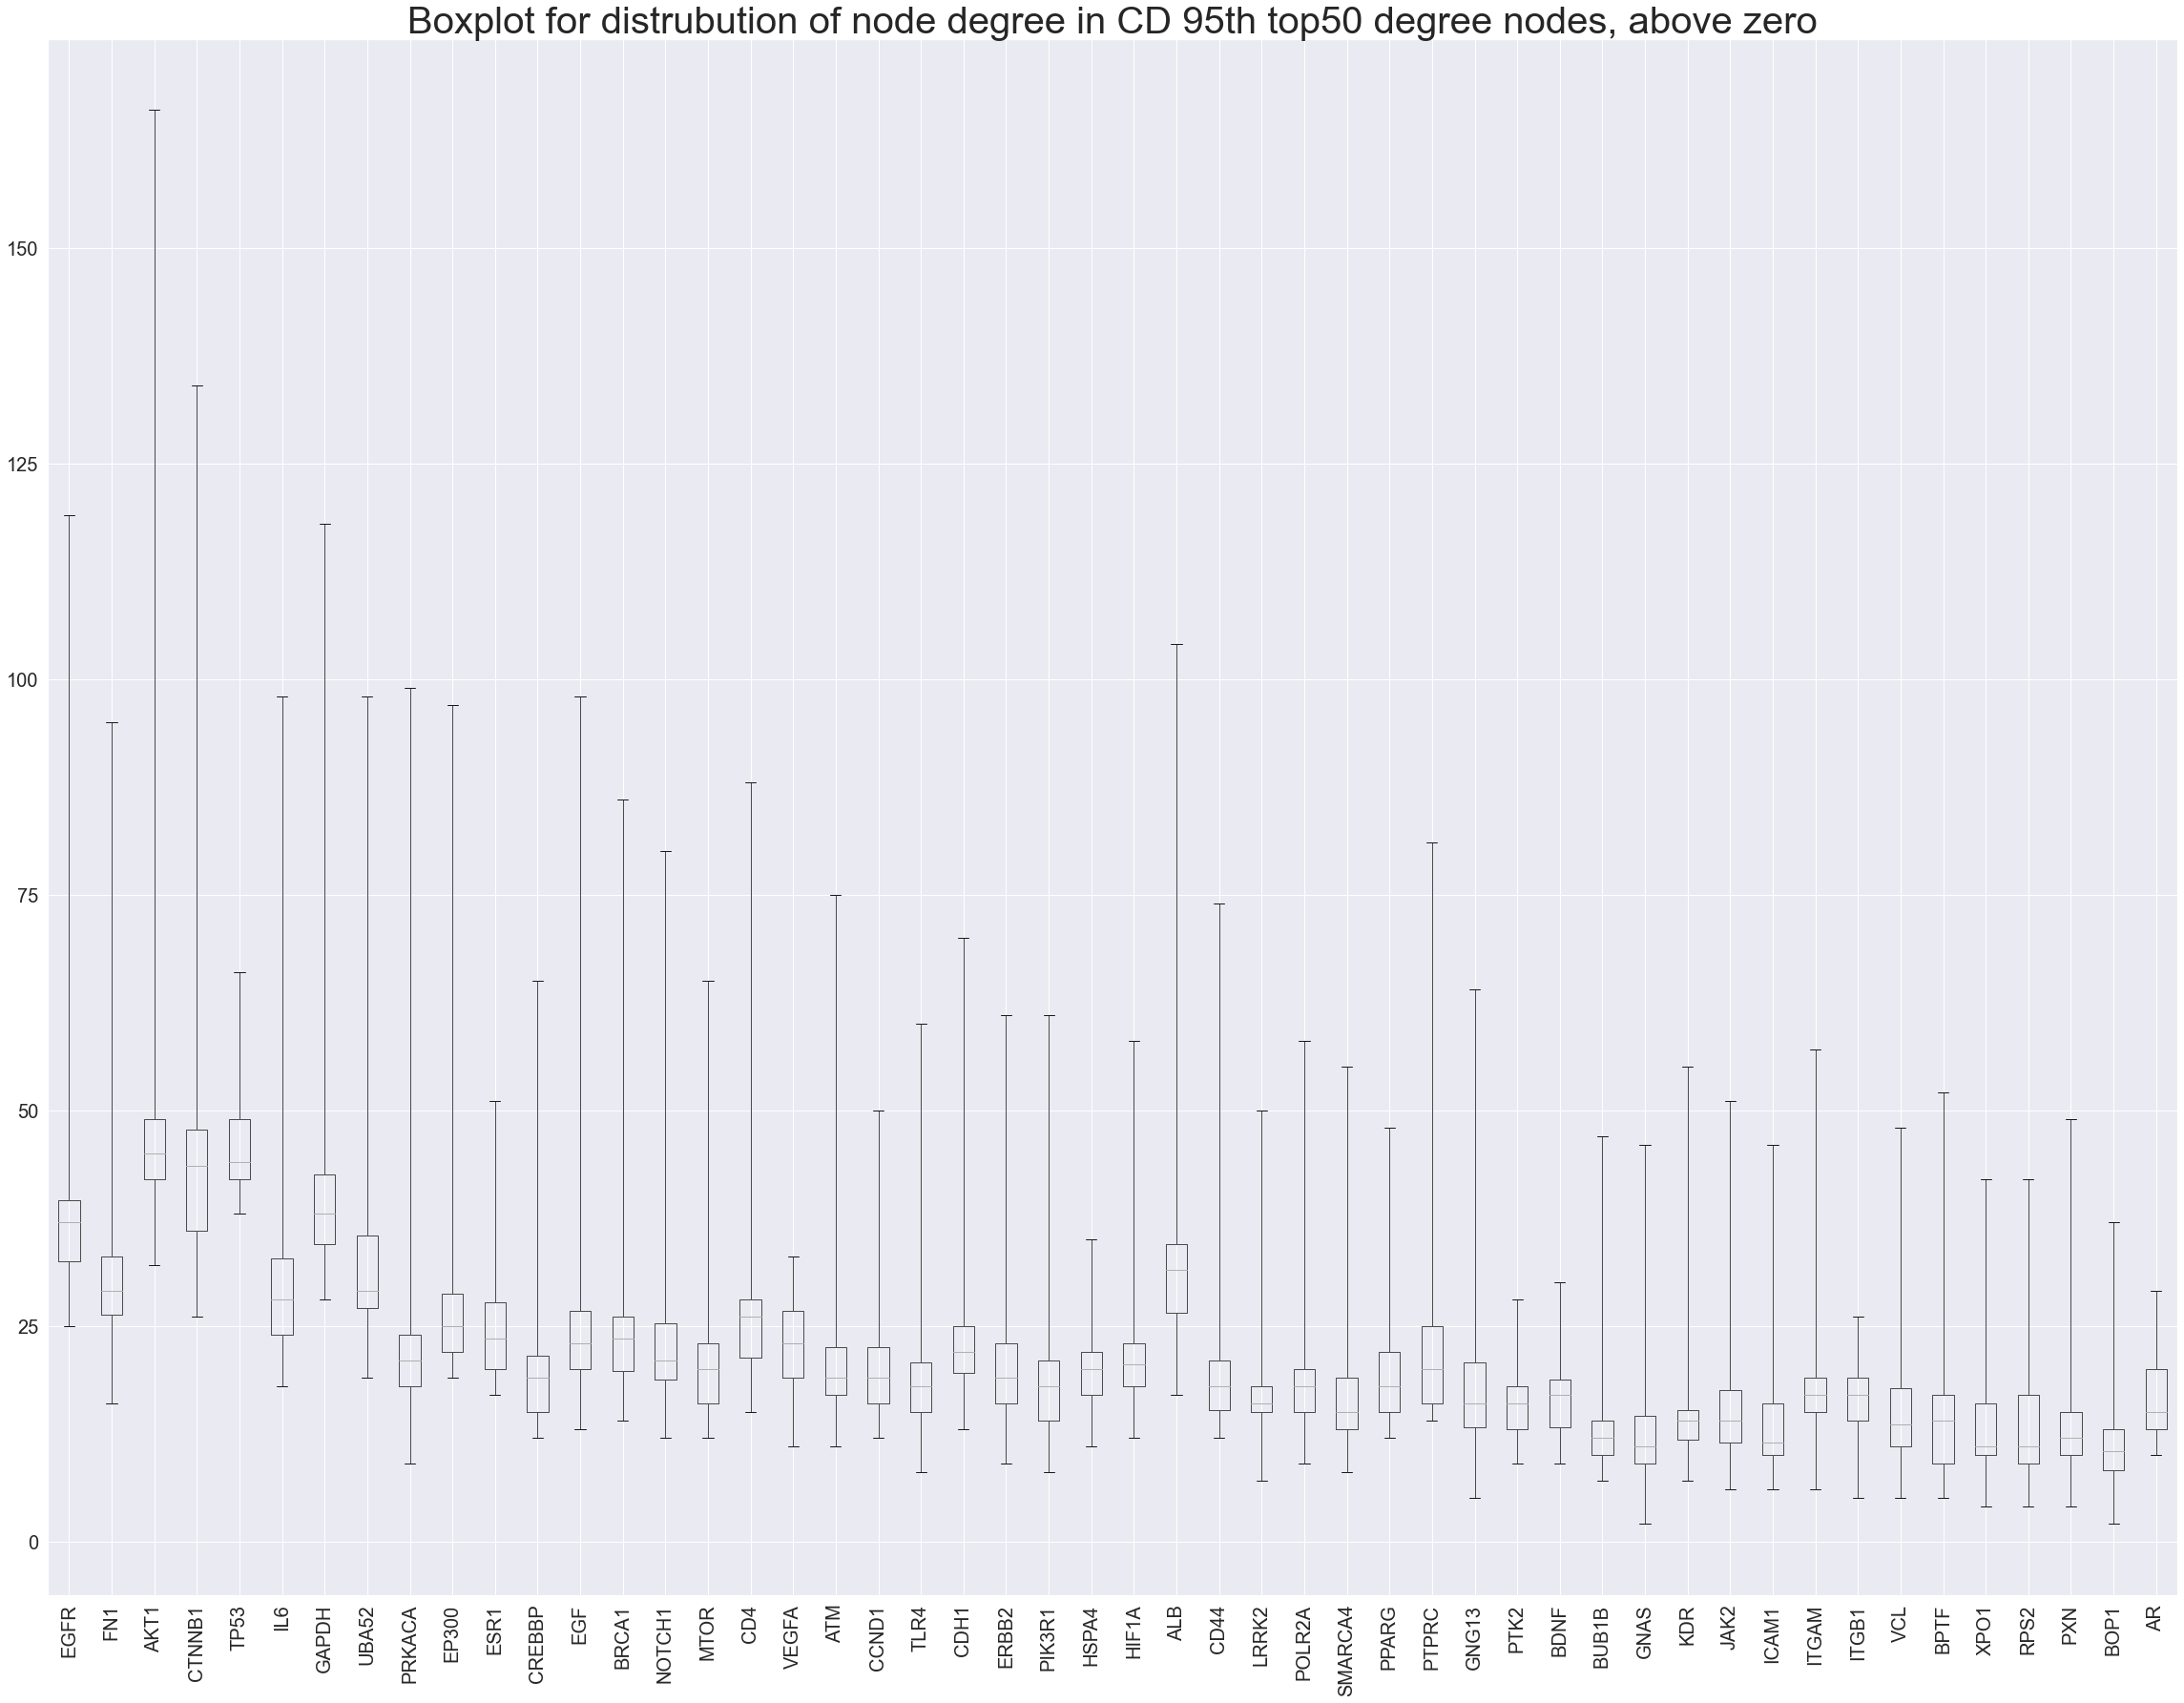

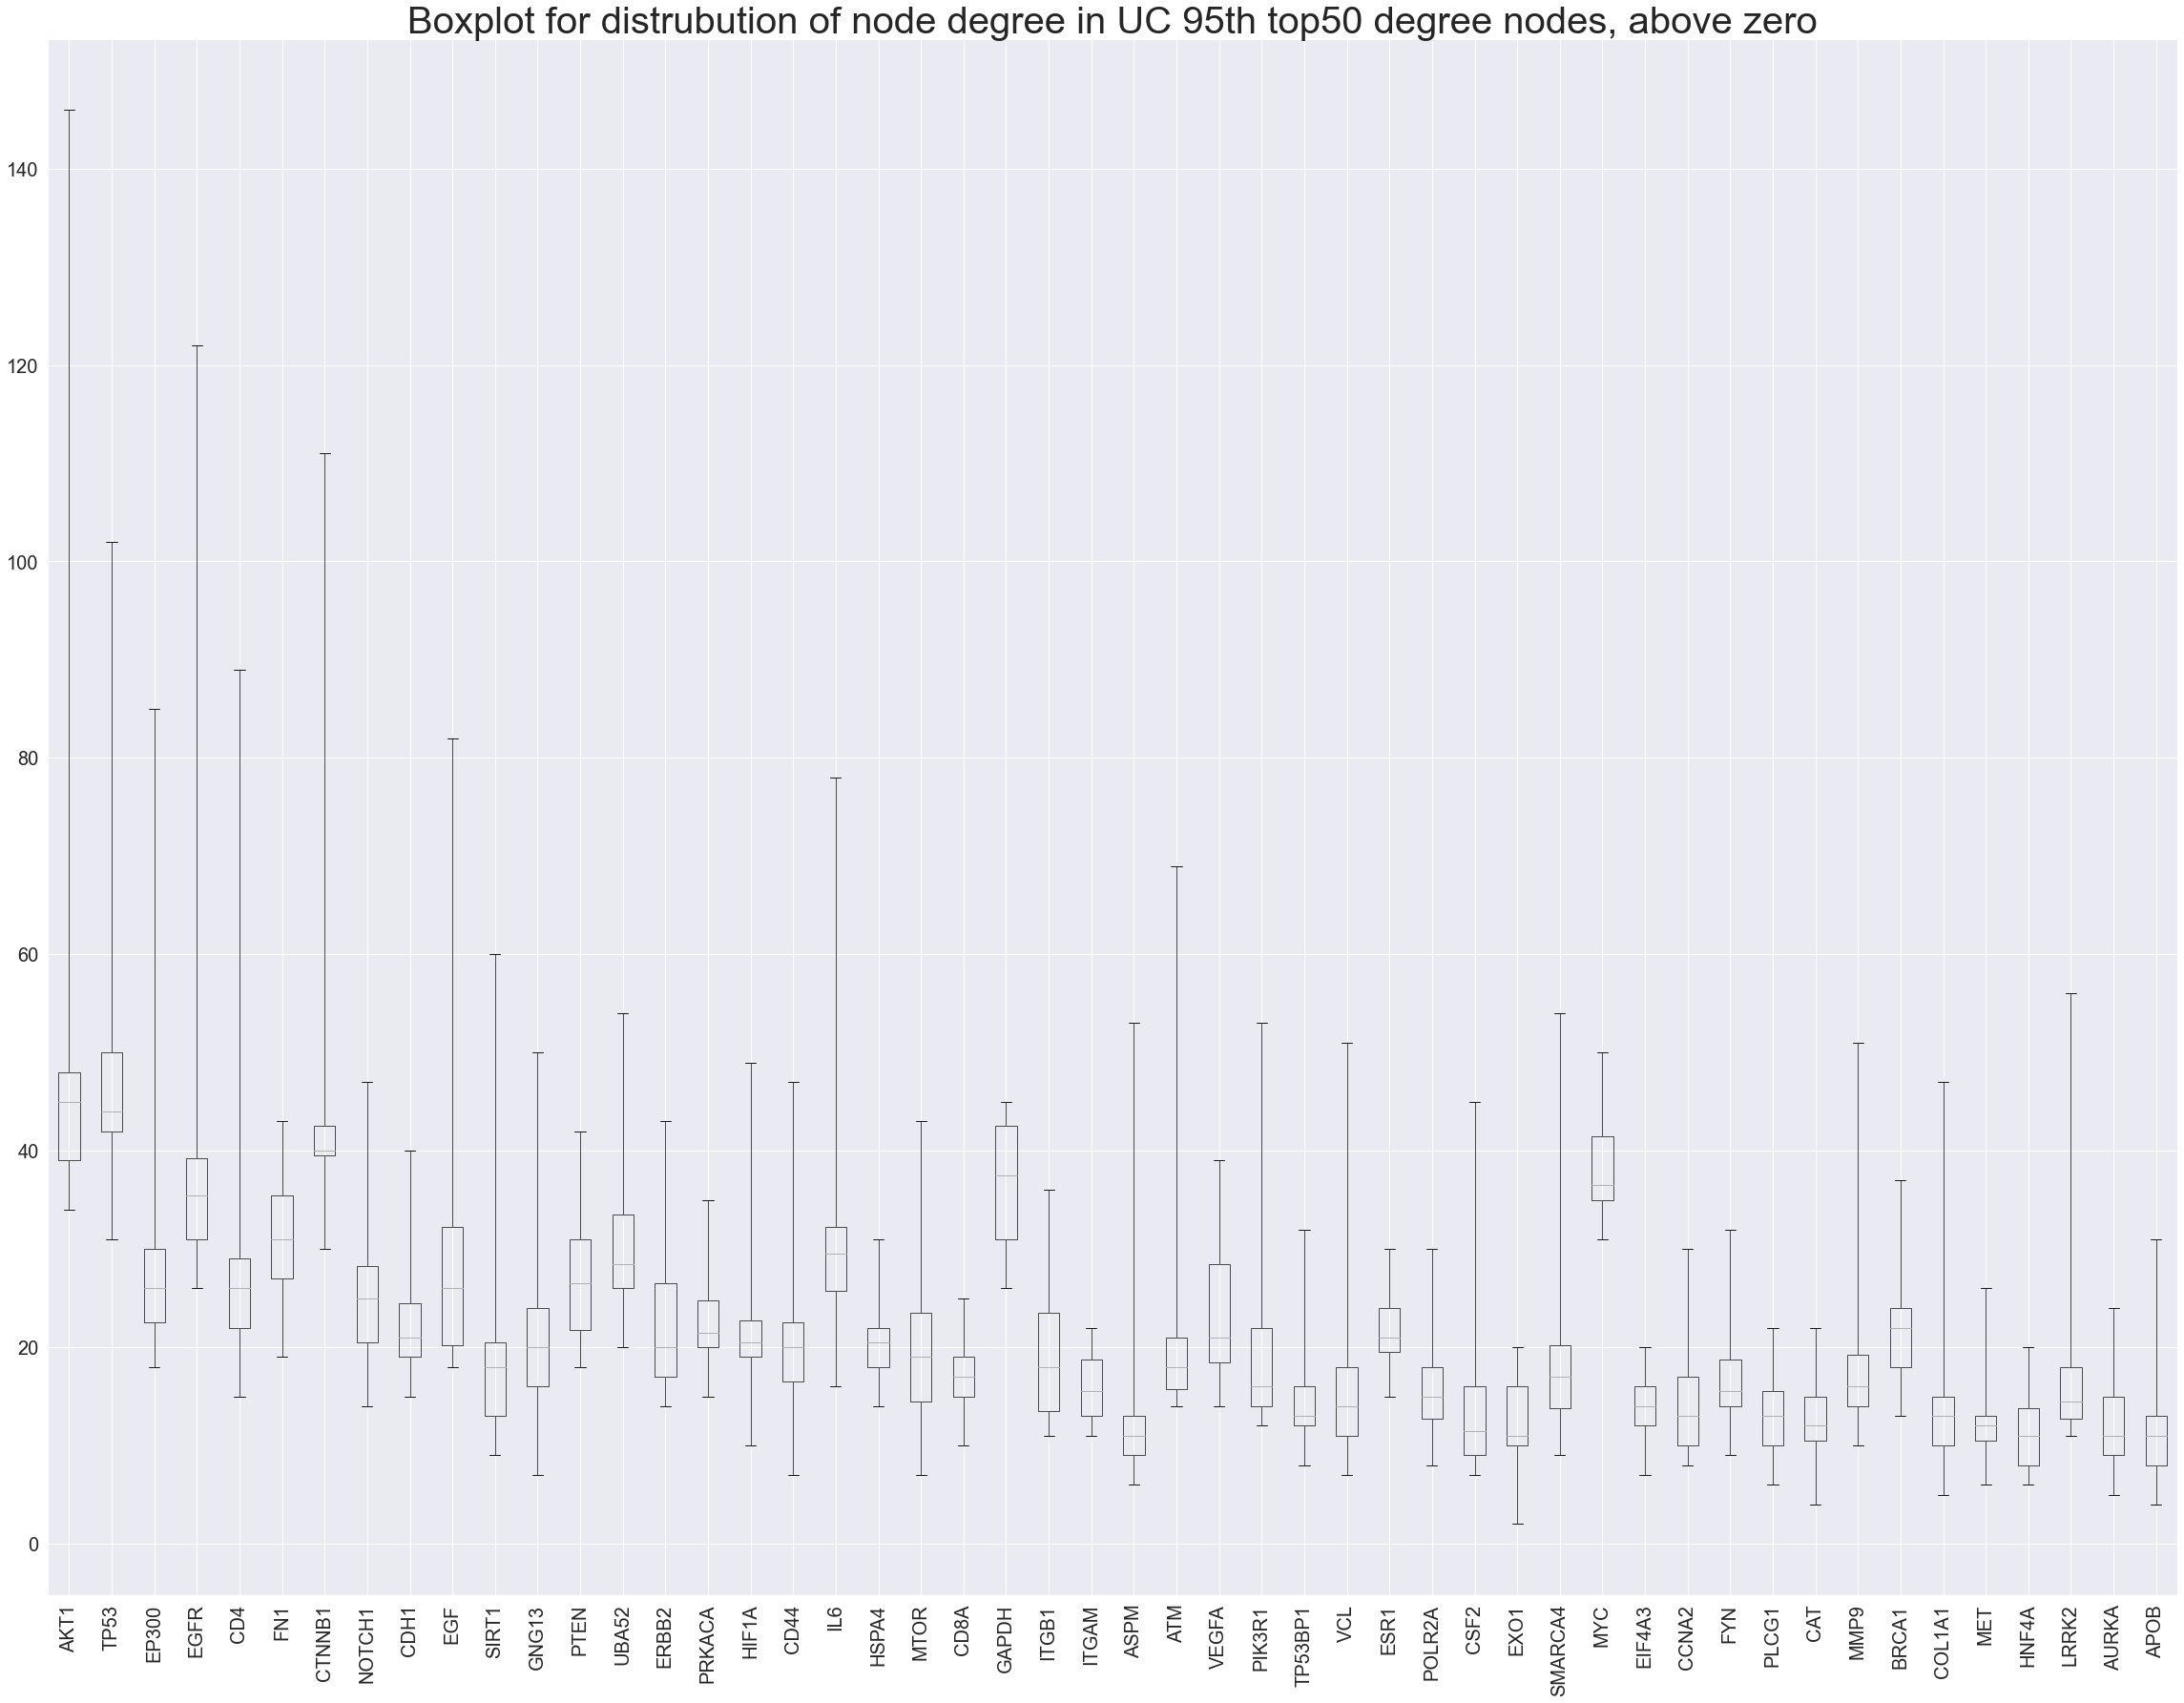

In [71]:
create_boxplot_above_zero(CD_95_node_df, CD_95_top_degree, name="CD 95th top50 degree nodes, above zero", save=True)
create_boxplot_above_zero(UC_95_gl_node_df, UC_95_top_degree, name="UC 95th top50 degree nodes, above zero", save=True)


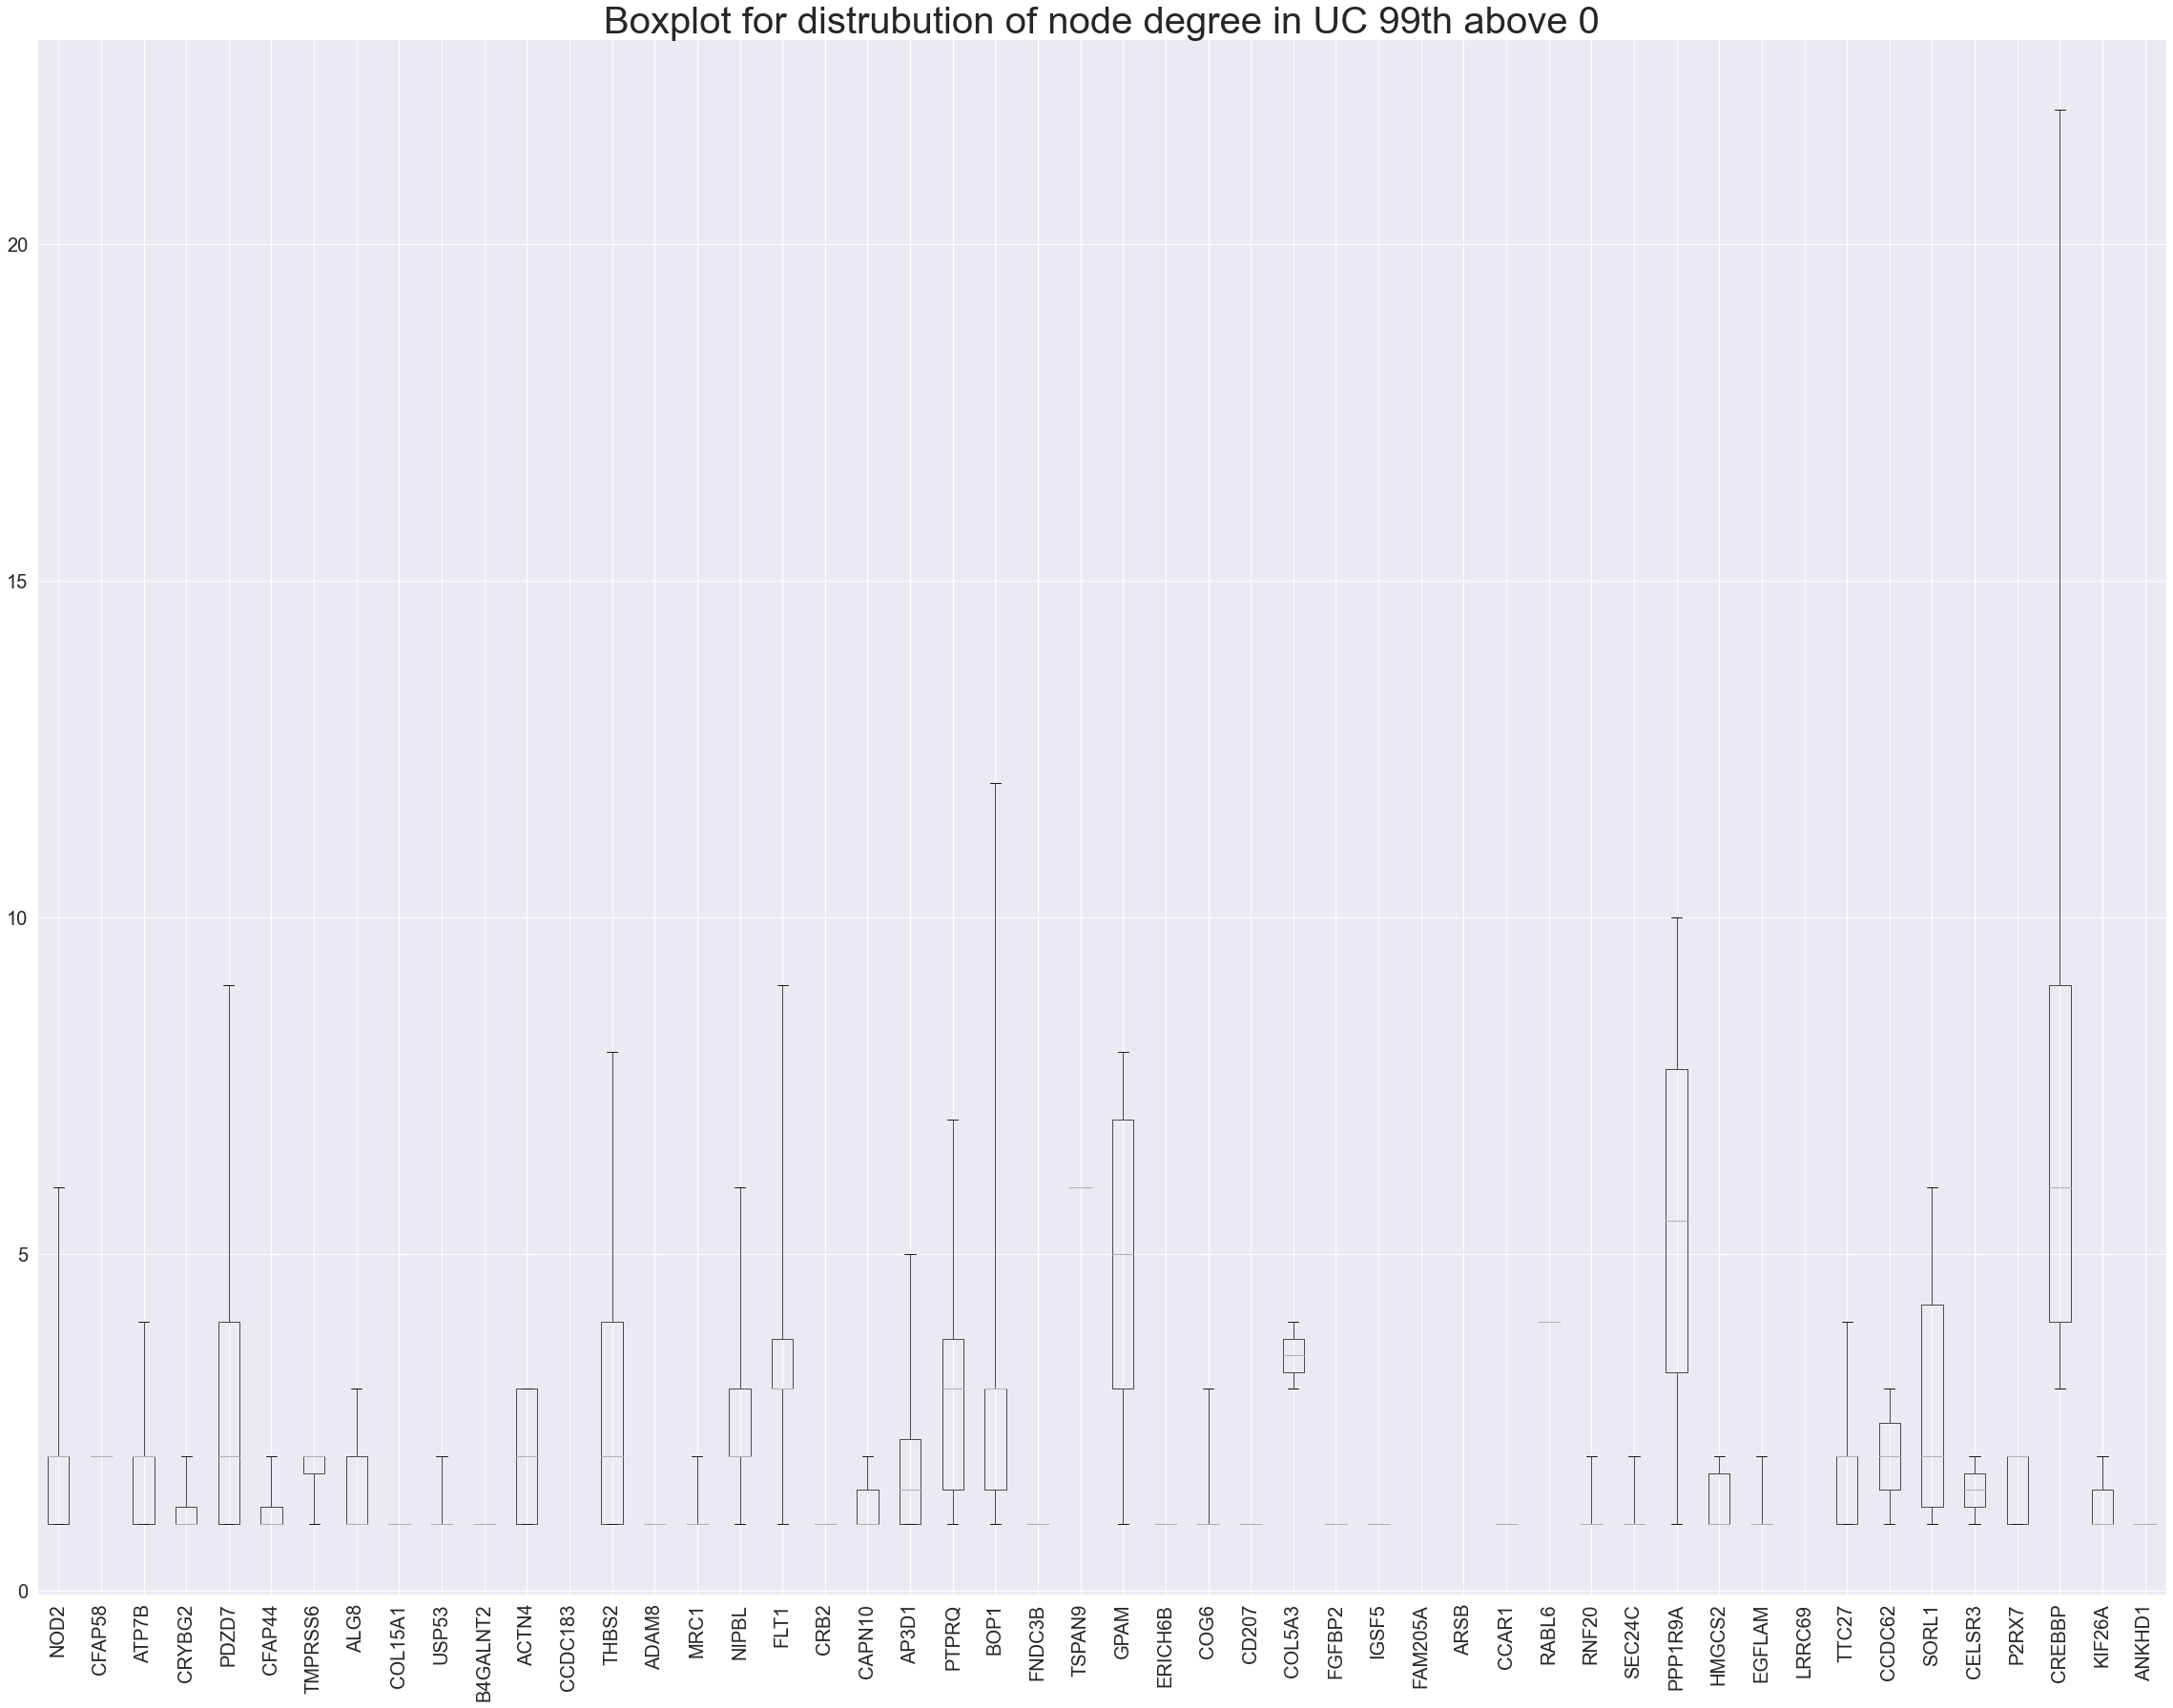

In [64]:
create_boxplot_above_zero(CD_99_node_df, CD_95_top, name="UC 99th above 0", save=False)

create_boxploting Add back genes

In [49]:
def create_network(file, df):
    patient_name = file.split(".")[0]
    G = nx.Graph(name = patient_name)
    G.add_nodes_from(get_patient.get_genes_above_zero(df, patient_name))
    G.read_weighted_edgelist("patient_networks/UC_99_network/"+file,
                             delimiter = "\t",
                             encoding='utf-8')
    return G

test = create_network("PR0045.txt", UC_bin_99)
                     

AttributeError: 'Graph' object has no attribute 'read_weighted_edgelist'

In [58]:
patient_name = file.split(".")[0]
patient_edge = nx.read_weighted_edgelist(directory+file,
                                         delimiter = "\t",
                                         encoding='utf-8')
G = nx.Graph(incoming_graph_data=patient_edge, 
             name = patient_name)
G.add_nodes_from(get_patient.get_genes_above_zero(UC_bin_99, patient_name))
G.number_of_nodes()

114

In [6]:
UC_bin_99.index

Index(['AP0045', 'AP0046', 'AP0065', 'AP0088', 'AP0127', 'AP0142', 'AP0149',
       'AP0205', 'AP0249', 'AP0273',
       ...
       'SOPR0549', 'SORL0025', 'SORL0028', 'SORL0031', 'SORL0034', 'SORL0036',
       'SORL0037', 'SORL0038', 'SORL0040', 'SORL0041'],
      dtype='object', name='IID', length=368)

In [12]:
ppi_df = get_PPI.get_PPI_df(UC_bin_99, "PR0045")[["preferredName_A", "preferredName_B","score"]]
G = nx.Graph(nx.from_pandas_edgelist(ppi_df, source="preferredName_A",target="preferredName_B", edge_attr="score"), name="PR0045")
G.add_nodes_from(get_patient.get_genes_above_zero(UC_bin_99, "PR0045") )

In [4]:
import get_network_analysis
directory = "patient_networks/UC_99_network/"
Glist = get_network_analysis.create_graph_list(directory)

### Checking physical networks

In [1]:
import get_PPI
from binerised import CD_bin_97_5, UC_bin_97_5, CD_bin_99, UC_bin_99


In [2]:
get_PPI.get_physical_PPI_df(CD_bin_97_5, 0)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000167586,9606.ENSP00000385636,KRT14,OBSL1,9606,0.483,0,0,0,0,0.483,0,0
2,9606.ENSP00000216294,9606.ENSP00000380904,SNAPC1,POLR3D,9606,0.6,0,0,0,0,0,0.6,0
4,9606.ENSP00000230340,9606.ENSP00000323046,BYSL,EXOSC3,9606,0.675,0,0,0,0,0.675,0,0
6,9606.ENSP00000282670,9606.ENSP00000323580,TCTEX1D1,IFT88,9606,0.6,0,0,0,0,0,0.6,0
8,9606.ENSP00000296464,9606.ENSP00000318147,HSPA4L,EDEM3,9606,0.669,0,0,0,0,0.669,0,0
10,9606.ENSP00000297591,9606.ENSP00000361930,VIRMA,YWHAB,9606,0.408,0,0,0,0,0.409,0,0
12,9606.ENSP00000297591,9606.ENSP00000416951,VIRMA,ZC3H18,9606,0.408,0,0,0,0,0.409,0,0
14,9606.ENSP00000312741,9606.ENSP00000385636,CAMKK2,OBSL1,9606,0.48,0,0,0,0,0.48,0,0
16,9606.ENSP00000320821,9606.ENSP00000361930,KIF1C,YWHAB,9606,0.458,0,0,0,0,0.307,0,0.251
18,9606.ENSP00000326261,9606.ENSP00000416951,SRRM1,ZC3H18,9606,0.41,0,0,0,0,0.411,0,0


## Get missing 

In [161]:
get_network_analysis.get_missing_patients('patient_networks/CD_95_network_3/')


[]

In [156]:
def fast(df, i):
    patient_net = get_PPI.get_PPI_df(df, i)
    edge_data = {'source': patient_net["preferredName_A"],
                 'target': patient_net["preferredName_B"],
                 'String_Score': patient_net["score"]
                }
    edges = pd.DataFrame(data=edge_data, columns=['source', 
                                                  'target',
                                                  'String_Score'])
    edges.to_csv(f"patient_networks/Missing/{i}.txt",
                 sep="\t",
                 header=False,
                 index=False,
                 encoding="utf-8")
    return(print(f"Patient {i} completed"))

In [158]:
for i in UC_95_missing:
    fast(UC_bin_97_5, i)

Patient PR0053 completed


## Select PPIs >0.7
---

### Select from import 

### Select from graphs

In [37]:
def get_edges_with_weight(graph, edge_weight=0.7):
    edge_list = []
    for u, v, weight in graph.edges.data("weight"):
        if weight < edge_weight:
            edge_list.append((u,v,weight))
        else:
            continue
    graph = graph.remove_edges_from(edge_list)
    return graph


In [2]:
directory = "patient_networks/UC_99_network_2/"

UC_99_GL = get_network_analysis.create_graph_list_from_directory(directory)
UC_99_GL[0].edges.data("weight")

EdgeDataView([('RALBP1', 'HSF1', 0.543), ('HSF1', 'CSTF2', 0.529), ('KCNQ1', 'KCNE5', 0.891), ('ACOT8', 'ACSL3', 0.497), ('ACOT8', 'TYSND1', 0.907), ('HGF', 'IL1RN', 0.414), ('HGF', 'THBS1', 0.533), ('HGF', 'CTNNA1', 0.903), ('HGF', 'NRP1', 0.919), ('THBS1', 'LUM', 0.457), ('THBS1', 'SETD1B', 0.9), ('THBS1', 'ADAMTS17', 0.933), ('CTNNA1', 'RAB5A', 0.903), ('CTNNA1', 'SETD1B', 0.433), ('NRP1', 'DLL4', 0.545), ('IBSP', 'BMP6', 0.422), ('IBSP', 'ATF4', 0.425), ('IBSP', 'PTH1R', 0.481), ('BMP6', 'WNT2B', 0.41), ('BMP6', 'GREM2', 0.84), ('ATF4', 'CREB3L2', 0.859), ('HCFC2', 'SETD1B', 0.473), ('HCFC2', 'MOCS2', 0.7), ('MOCS2', 'ACBD4', 0.407), ('MEP1A', 'ADGRF5', 0.427), ('MEP1A', 'MME', 0.828), ('MME', 'TFE3', 0.611), ('MFSD13A', 'INO80D', 0.629), ('GHSR', 'BRCA1', 0.45), ('BRCA1', 'CEP72', 0.669), ('BRCA1', 'RAD9A', 0.936), ('BRCA1', 'STAT5A', 0.954), ('BRCA1', 'CSTF2', 0.738), ('BRCA1', 'BRAP', 0.962), ('RRM2B', 'SLBP', 0.593), ('RRM2B', 'MCM9', 0.615), ('RRM2B', 'NME2', 0.685), ('SLBP', 

In [3]:
get_network_analysis.get_edges_with_weight_in_graph_list(UC_99_GL)

In [4]:
UC_99_GL[0].edges.data("weight")

EdgeDataView([('KCNQ1', 'KCNE5', 0.891), ('ACOT8', 'TYSND1', 0.907), ('HGF', 'CTNNA1', 0.903), ('HGF', 'NRP1', 0.919), ('THBS1', 'SETD1B', 0.9), ('THBS1', 'ADAMTS17', 0.933), ('CTNNA1', 'RAB5A', 0.903), ('BMP6', 'GREM2', 0.84), ('ATF4', 'CREB3L2', 0.859), ('HCFC2', 'MOCS2', 0.7), ('MEP1A', 'MME', 0.828), ('BRCA1', 'RAD9A', 0.936), ('BRCA1', 'STAT5A', 0.954), ('BRCA1', 'CSTF2', 0.738), ('BRCA1', 'BRAP', 0.962), ('SLBP', 'RANBP2', 0.916), ('SLBP', 'CSTF2', 0.71), ('MCM9', 'HFM1', 0.766), ('RAB5A', 'PIK3CB', 0.992), ('PIK3CB', 'SYNJ2', 0.704), ('RANBP2', 'HSPA12A', 0.927), ('NFS1', 'GLRX3', 0.718), ('ENO4', 'MDH1', 0.736), ('PGM5', 'MDH1', 0.809), ('ZBTB44', 'NBEAL1', 0.745)])

multigraph?


In [9]:
UC_99_MG = get_network_analysis.create_multiple_graph(directory)


In [ ]:
G = nx.MultiGraph(name=[f for f in os.listdir(directory) if not f.startswith('.')]

In [41]:
[colname.split("_")[0] for colname in CD_bin_95.columns]
CD_bin_95.rename(columns = lambda colname: colname.split("_")[0])

,A1BG,A1CF,A2ML1,A2M,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
IID,,,,,,,,,,,,,,,,,,,,,
AP0013,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0276,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
SORL0032,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
SORL0033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import get_PPI
from binerised import UC_bin_99


In [2]:
response = get_PPI.get_protein_interactions(UC_bin_99,0)

In [3]:
for line in response.text.strip().split("\n"):
    # seperates each line into list
    l = line.strip().split("\t")
    print(l)
        

['9606.ENSP00000184956', '9606.ENSP00000297440', 'HEATR6', 'DNAAF5', '9606', '0.611', '0', '0', '0', '0', '0', '0', '0.611']
['9606.ENSP00000184956', '9606.ENSP00000297440', 'HEATR6', 'DNAAF5', '9606', '0.611', '0', '0', '0', '0', '0', '0', '0.611']
['9606.ENSP00000218176', '9606.ENSP00000252321', 'KCND1', 'KCNA5', '9606', '0.622', '0', '0', '0.439', '0.064', '0', '0.5', '0.679']
['9606.ENSP00000218176', '9606.ENSP00000252321', 'KCND1', 'KCNA5', '9606', '0.622', '0', '0', '0.439', '0.064', '0', '0.5', '0.679']
['9606.ENSP00000218176', '9606.ENSP00000302719', 'KCND1', 'KCNAB3', '9606', '0.803', '0', '0', '0', '0.062', '0.159', '0.6', '0.451']
['9606.ENSP00000218176', '9606.ENSP00000302719', 'KCND1', 'KCNAB3', '9606', '0.803', '0', '0', '0', '0.062', '0.159', '0.6', '0.451']
['9606.ENSP00000220003', '9606.ENSP00000298229', 'CSK', 'INPPL1', '9606', '0.46', '0', '0', '0', '0.306', '0.056', '0', '0.242']
['9606.ENSP00000220003', '9606.ENSP00000298229', 'CSK', 'INPPL1', '9606', '0.46', '0', 

In [8]:
get_PPI.get_PPI_df(UC_bin_99,9)

ValueError: cannot set a row with mismatched columns



### create new file list

## Network analysis
---
Count the number of edges in multigraph

In [6]:
CD_95_mg = get_network_analysis.create_multiple_graph('patient_networks/CD_95_network_3/')

UC_95_mg = get_network_analysis.create_multiple_graph('patient_networks/UC_95_network_3/')

In [24]:
edge_df = []
for edge in CD_95_mg.edges:
    edge_num = CD_95_mg.number_of_edges(edge[0], edge[1])
    edge_df.append([edge[0],edge[1],edge_num])

In [40]:
edf = pd.DataFrame(data=edge_df, columns=['source', 'target', 'Patients']).drop_duplicates()
edf


,source,target,Patients
0,ABCA12,ALOXE3,3
3,ABCA12,CYP4F22,1
4,ABCA12,TGM1,1
5,ABCA12,LIPN,1
6,ABLIM1,DCC,1
...,...,...,...
38222,MAPK8,RIPK2,1
38223,CTBP1,CTNNB1,1
38224,HTN3,ZNF91,1
38225,PLRG1,PRPF40B,1


### Function to count pairwise edges 

In [7]:
def count_patient_edges(multigraph):
    edge_list = []
    for edge in multigraph.edges:
        edge_num = multigraph.number_of_edges(edge[0], edge[1])
        edge_list.append([edge[0],edge[1],edge_num])
    return pd.DataFrame(data=edge_list, columns=['source', 'target', 'Patients']).drop_duplicates()

In [8]:
def count_patient_edges2(multigraph):
    edge_df = [[edge[0], edge[1], multigraph.number_of_edges(edge[0], edge[1])] for edge in multigraph.edges]
    return pd.DataFrame(data=edge_df, columns=['source', 'target', 'Patients']).drop_duplicates()

In [9]:
CD_95_edge = count_patient_edges(CD_95_mg).sort_values(by = 'Patients', ascending=False).reset_index(drop=True)
UC_95_edge = count_patient_edges2(UC_95_mg).sort_values(by = 'Patients', ascending=False).reset_index(drop=True)

In [113]:
CD_95_phys_edge = count_patient_edges2(CD_95_mg_physical).sort_values(by = 'Patients', ascending=False).reset_index(drop=True)
UC_95_phys_edge = count_patient_edges2(UC_95_mg_physical).sort_values(by = 'Patients', ascending=False).reset_index(drop=True)

In [120]:
UC_95_mg_physical.number_of_edges()

6144

In [18]:
CD_95_edge['edge_name'] = CD_95_edge['source']+' (pp) '+CD_95_edge['target'] 
CD_95_edge.to_csv('num_of_p_edges.csv')

In [19]:
CD_95_edge

,source,target,Patients,edge_name
0,DSTYK,TMCC2,18,DSTYK (pp) TMCC2
1,PATL2,SPG11,14,PATL2 (pp) SPG11
2,GCFC2,MRPL19,13,GCFC2 (pp) MRPL19
3,PCF11,ANKRD42,11,PCF11 (pp) ANKRD42
4,MYH2,MYH8,10,MYH2 (pp) MYH8
...,...,...,...,...
28570,MRPL15,MRPS9,1,MRPL15 (pp) MRPS9
28571,MRPL15,MRPL53,1,MRPL15 (pp) MRPL53
28572,MPO,CD7,1,MPO (pp) CD7
28573,MPO,ITGAM,1,MPO (pp) ITGAM


In [16]:
UC_95_edge['4'] = UC_95_edge['source']+' (pp) '+UC_95_edge['target'] 

In [17]:
UC_95_edge

,source,target,Patients,4
0,ORM2,AHSG,2,ORM2 (pp) AHSG
1,TPP1,MFSD8,2,TPP1 (pp) MFSD8
2,PLXNB3,SEMA4D,2,PLXNB3 (pp) SEMA4D
3,KIF2B,CENPE,2,KIF2B (pp) CENPE
4,RSRC1,LUC7L,2,RSRC1 (pp) LUC7L
...,...,...,...,...
2931,MARCHF10,CABYR,1,MARCHF10 (pp) CABYR
2932,MYH1,TPM1,1,MYH1 (pp) TPM1
2933,NCAPD2,INCENP,1,NCAPD2 (pp) INCENP
2934,NCAPD2,SPAG5,1,NCAPD2 (pp) SPAG5


### triangles

In [86]:
list(nx.common_neighbors(CD_95_mg, 'NOD2', 'TLR4'))

['TLR5', 'IRAK2', 'TAB3']

In [ ]:
for line in UC_95_edge.itertuples(index=False,name=None):
    print(nx.common_neighbors(UC_95_mg, line[0], line[1]))
#nx.common_neighbours

### NOD2 pairs

In [61]:
NOD2_edge1 = CD_95_edge[CD_95_edge['source']=='NOD2']
NOD2_edge2 = CD_95_edge[CD_95_edge['target']=='NOD2']
NOD2_st = pd.concat([NOD2_edge1, NOD2_edge2])

In [46]:
for dicItems in CD_95_mg.get_edge_data('NOD2','LRRK2').items():
    print(dicItems[1]['name'])

PR0200
SOPR0400
SOAD0251


In [125]:
big_list = []
for line in NOD2_st.itertuples(index=False,name=None):
    p_list = []
    for dicItems in CD_95_mg.get_edge_data(str(line[0]),str(line[1])).items():
        p_names = dicItems[1]['name']
        p_list.append(p_names)
    big_list.append(p_list)

print(big_list)

[['PR0200', 'SOPR0400', 'SOAD0251'], ['SOPR0409', 'SOAD0306', 'SOAD0029'], ['SOAD0512', 'PR0070'], ['SOPR0239', 'SOAD0530'], ['SOAD0396', 'PR0094'], ['SOPR0409', 'SOAD0265'], ['SOAD0512', 'PR0074'], ['SOPR0345', 'PR0070'], ['PR0185'], ['PR0184'], ['SOPR0400'], ['SORL0032'], ['SORL0032'], ['SOAD0396'], ['SOPR0440'], ['PR0212'], ['SOAD0306', 'SORL0032', 'PR0184'], ['SOAD0029', 'SOPR0310', 'SOAD0455'], ['SOAD0029', 'SOAD0416', 'SOPR0401'], ['SOAD0050']]


In [127]:
[[dicItems[1]['name'] for dicItems in CD_95_mg.get_edge_data(str(line[0]),str(line[1])).items()] for line in NOD2_st.itertuples(index=False,name=None)]

[['PR0200', 'SOPR0400', 'SOAD0251'],
 ['SOPR0409', 'SOAD0306', 'SOAD0029'],
 ['SOAD0512', 'PR0070'],
 ['SOPR0239', 'SOAD0530'],
 ['SOAD0396', 'PR0094'],
 ['SOPR0409', 'SOAD0265'],
 ['SOAD0512', 'PR0074'],
 ['SOPR0345', 'PR0070'],
 ['PR0185'],
 ['PR0184'],
 ['SOPR0400'],
 ['SORL0032'],
 ['SORL0032'],
 ['SOAD0396'],
 ['SOPR0440'],
 ['PR0212'],
 ['SOAD0306', 'SORL0032', 'PR0184'],
 ['SOAD0029', 'SOPR0310', 'SOAD0455'],
 ['SOAD0029', 'SOAD0416', 'SOPR0401'],
 ['SOAD0050']]

In [63]:
NOD2_st['patient_names'] = big_list

In [123]:
CD_bin_99['NOD2'][CD_bin_99['NOD2']>0]

IID
PR0052      1
PR0074      1
PR0094      1
SOAD0050    1
SOPR0393    1
SOPR0394    1
Name: NOD2, dtype: int64

In [133]:

def count_patient_edges(multigraph, gene=None):
    edge_df = [[edge[0], edge[1], multigraph.number_of_edges(edge[0], edge[1])] for edge in multigraph.edges]
    patient_edge_df = pd.DataFrame(data=edge_df, 
                                   columns=['source', 'target', 'Patients']).drop_duplicates().sort_values(by = 'Patients', ascending=False).reset_index(drop=True)
    if gene == None:
        return patient_edge_df
    else:
        gene_edge1 = patient_edge_df[patient_edge_df['source']==gene]
        gene_edge2 = patient_edge_df[patient_edge_df['target']==gene]
        gene_edge_df = pd.concat([gene_edge1, gene_edge2])
        return gene_edge_df

In [144]:
def get_patient_names_from_multigraph(multigraph, gene = None):
    patient_list = [[dicItems[1]['name'] for dicItems in multigraph.get_edge_data(str(line[0]),str(line[1])).items()] for line in count_patient_edges(multigraph, gene).itertuples(index=False,name=None)]
    df = count_patient_edges(multigraph, gene)
    df['patients_names'] = patient_list
    return df

list1 = get_patient_names_from_multigraph(CD_95_mg)
list1.head(10)

,source,target,Patients,patients_names
0,DSTYK,TMCC2,18,"[SOPR0357, SOPR0551, SOAD0500, SOPR0546, SOAD0..."
1,PATL2,SPG11,14,"[SOPR0509, SOAD0612, SOPR0297, SOPR0288, SOAD0..."
2,GCFC2,MRPL19,13,"[SOAD0249, PR0171, PR0165, SOAD0212, PR0064, S..."
3,PCF11,ANKRD42,11,"[SOPR0368, SOAD0463, PR0007, SOAD0216, SOAD059..."
4,MYH2,MYH8,10,"[SOAD0103, SOAD0538, SOPR0342, SOPR0426, SOAD0..."
5,LCE2A,LCE4A,10,"[SOPR0345, SOPR0247, SOPR0446, SOAD0384, SORL0..."
6,RAG1,RAG2,8,"[SOAD0306, SOPR0284, SOAD0228, SOAD0201, SOPR0..."
7,ZNF512,C2orf16,8,"[PR0148, SOPR0483, SOPR0256, SOAD0125, SOAD052..."
8,STX8,VPS18,6,"[SOAD0363, SOAD0406, SOAD0179, SOAD0555, SORL0..."
9,FAT3,MTNR1B,6,"[SOAD0189, SOPR0245, PR0070, SOAD0152, PR0023,..."


In [139]:
count_patient_edges(CD_95_mg, gene='NOD2')

,source,target,Patients
663,NOD2,LRRK2,3
664,NOD2,TLR5,3
5139,NOD2,DDX58,2
5146,NOD2,TLR4,2
5147,NOD2,HSP90AA1,2
5149,NOD2,TLR2,2
5151,NOD2,ERBIN,2
5152,NOD2,VIM,2
28241,NOD2,TAB3,1
28242,NOD2,NLRP1,1


In [64]:
NOD2_st

,source,target,Patients,edge_name,patient_names
663,NOD2,LRRK2,3,NOD2 (pp) LRRK2,"[PR0200, SOPR0400, SOAD0251]"
664,NOD2,TLR5,3,NOD2 (pp) TLR5,"[SOPR0409, SOAD0306, SOAD0029]"
5139,NOD2,DDX58,2,NOD2 (pp) DDX58,"[SOAD0512, PR0070]"
5146,NOD2,TLR4,2,NOD2 (pp) TLR4,"[SOPR0239, SOAD0530]"
5147,NOD2,HSP90AA1,2,NOD2 (pp) HSP90AA1,"[SOAD0396, PR0094]"
5149,NOD2,TLR2,2,NOD2 (pp) TLR2,"[SOPR0409, SOAD0265]"
5151,NOD2,ERBIN,2,NOD2 (pp) ERBIN,"[SOAD0512, PR0074]"
5152,NOD2,VIM,2,NOD2 (pp) VIM,"[SOPR0345, PR0070]"
28241,NOD2,TAB3,1,NOD2 (pp) TAB3,[PR0185]
28242,NOD2,NLRP1,1,NOD2 (pp) NLRP1,[PR0184]


In [65]:
dir(py4)
py4.cytoscape_ping()
py4.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

In [66]:

py4.create_network_from_data_frames(edges=NOD2_st)

Applying default style...
Applying preferred layout


{'networkSUID': 452}

In [67]:
NOD2_st.to_csv('NOD2_st.csv')

In [167]:
node_list = pd.unique(NOD2_st[['source', 'target']].values.ravel('K'))
node_list
#py4.create_network_from_networkx(CD_95_mg.subgraph(node_list))

array(['NOD2', 'SHARPIN', 'TBK1', 'RNF31', 'IRAK2', 'LRRK2', 'TLR5',
       'DDX58', 'TLR4', 'HSP90AA1', 'TLR2', 'ERBIN', 'VIM', 'TAB3',
       'NLRP1', 'MAP2K3', 'TLR3', 'RIPK2', 'OAS2', 'TLR7', 'MEFV'],
      dtype=object)

In [73]:
cytoscape.create_multigraph_network_in_cytoscape(CD_95_mg.subgraph(node_list))

Applying default style...
Applying preferred layout


{'networkSUID': 1318}

### find pa CD_95_edge with NOD2 pairwise interactions 

In [20]:
def multiple_graph(directory):

    G = nx.MultiGraph()
    patient = {}
    for file in os.listdir(directory):
        patient_edge = nx.to_edgelist(nx.read_edgelist(directory+file, data =[('Weight', float)]))
        G.add_edges_from(patient_edge, **patient)
    return G

### Create network in cytoscape

In [12]:
import cytoscape

cytoscape.create_multigraph_network_in_cytoscape(CD_95_mg)

You are connected to Cytoscape!
Applying default style...
Applying preferred layout


{'networkSUID': 127}

### NetworkX algorithms

## top 1% pairwise 

In [88]:
CD_99_mg = get_network_analysis.create_multiple_graph('patient_networks/CD_99_network_3/')
UC_99_mg = get_network_analysis.create_multiple_graph('patient_networks/UC_99_network_3/')

In [93]:
count_patient_edges(CD_99_mg).sort_values(by = 'Patients', ascending=False).reset_index(drop=True)

,source,target,Patients
0,HEYL,JAG1,3
1,HAAO,CAT,3
2,CHMP4A,UBAP1,2
3,ATAD5,RAD52,2
4,MRPL32,MRPS27,2
...,...,...,...
4905,PREP,DPP8,1
4906,PLCG2,INPP5B,1
4907,PLCG2,INPP5A,1
4908,PLCG2,PPP3CC,1


## Physical

In [100]:
# mg
CD_95_mg_physical = get_network_analysis.create_multiple_graph('patient_networks/CD_95_network_physical/')
UC_95_mg_physical = get_network_analysis.create_multiple_graph('patient_networks/UC_95_network_physical/')

# gl
CD_95_gl_physical = get_network_analysis.create_graph_list_from_directory('patient_networks/CD_95_network_physical/')
UC_95_gl_physical = get_network_analysis.create_graph_list_from_directory('patient_networks/UC_95_network_physical/')

In [101]:
CD_95_phys_ND = get_network_analysis.get_node_degree_df(CD_95_gl_physical)
UC_95_phys_ND = get_network_analysis.get_node_degree_df(UC_95_gl_physical)



In [102]:
CD_95_phys_ND_top = get_network_analysis.get_top_genes(CD_95_phys_ND)
UC_95_phys_ND_top = get_network_analysis.get_top_genes(UC_95_phys_ND)

CD_bin_95_sum_topND = CD_bin_95.sum()[CD_95_phys_ND_top.index]
df3 = pd.concat([CD_95_ND_top, CD_bin_95_sum_topND], axis=1)
df3

AttributeError: 'Index' object has no attribute 'index'

In [103]:
def get_total_degree_from_multigraph(multigraph):
    dic = dict(multigraph.degree(list(multigraph.nodes)))
    return pd.Series(data=dic).sort_values(ascending=False)

In [105]:
# CD_95

CD_95_ND_top = get_total_degree_from_multigraph(CD_95_mg_physical).head(30)
CD_bin_95_sum_topND = CD_bin_95.sum()[CD_95_ND_top.index]

df_CD = pd.concat([CD_95_ND_top, CD_bin_95_sum_topND], axis=1)
df_CD.columns = ["Total Node degree", "No. of Patients"]
df_CD

,Total Node degree,No. of Patients
EP300,113,30
BRCA1,93,40
CREBBP,76,33
PIK3R1,74,27
LAMB1,64,33
LAMA3,63,33
FYN,63,26
ERBB2,60,40
ATM,60,34
LAMA1,57,36


In [112]:
CD_99_mg.number_of_edges()

5041

In [104]:
# UC _95

UC_95_ND_top = get_total_degree_from_multigraph(UC_95_mg_physical).head(30)
UC_bin_95_sum_topND = UC_bin_95.sum()[UC_95_ND_top.index]

df_UC = pd.concat([UC_95_ND_top, UC_bin_95_sum_topND], axis=1)
df_UC.columns = ["Total Node degree", "No. of Patients"]
df_UC

,Total Node degree,No. of Patients
FYN,43,17
EP300,41,12
BRCA1,40,14
CREBBP,40,14
NOP14,40,21
DMD,39,17
ITGA2,38,17
ITGA1,37,14
RPL13,34,17
LAMB1,34,19


In [98]:
dic = dict(CD_95_mg_physical.degree(list(CD_95_mg_physical.nodes)))
CD_95_phys_nd = pd.Series(data=dic).sort_values(ascending=False)

CD_95_phys_nd.head(30)

EP300      113
BRCA1       93
CREBBP      76
PIK3R1      74
LAMB1       64
LAMA3       63
FYN         63
ERBB2       60
ATM         60
LAMA1       57
SMARCA4     57
LAMA2       53
AGRN        52
MRPL57      48
GFM1        48
DMD         47
FN1         47
MRPL38      47
MRPS27      45
PTCD3       45
LAMC1       45
TRRAP       44
UTP20       44
LAMA5       44
MRPS28      44
NOP14       44
ITGB4       44
NCOR1       43
LAMA4       43
ESR1        43
dtype: int64

In [99]:
dic = dict(UC_95_mg_physical.degree(list(UC_95_mg_physical.nodes)))
UC_95_phys_nd = pd.Series(data=dic).sort_values(ascending=False)
UC_95_phys_nd.head(30)

FYN        43
EP300      41
BRCA1      40
CREBBP     40
NOP14      40
DMD        39
ITGA2      38
ITGA1      37
RPL13      34
LAMB1      34
RRP9       32
LAMA2      31
ATM        30
SRRM2      30
BECN1      29
FN1        28
NOP56      27
BCAR1      27
ITGB5      27
ITGB4      26
LAMB2      26
MRPL2      26
PRKDC      25
MRPL35     25
MRPL53     25
UTP20      25
LAMC3      24
MET        24
SMARCA4    24
NCOR1      24
dtype: int64

## Enhance multigraph function

In [172]:
subgraph = CD_95_mg.subgraph(node_list)

In [209]:
node_list = pd.unique(NOD2_st[['source', 'target']].values.ravel('K'))
node_list

# TODO: add node 
# TODO: list comprehension 
def create_multigraph_network_in_cytoscape(multigraph, diagnosis='CD'):
    edge_df = pd.DataFrame([[u, v, data['name'], data['weight']] for u, v, data in multigraph.edges.data()])
    edge_df['4'] = diagnosis
    edge_df['5'] = 'pp'
    edge_df.columns = ['source', 
                       'target',
                       'patientID', 
                       'weight',
                       'diagnosis',
                       'interaction']
    node_df = pd.DataFrame(pd.unique(edge_df[['source', 'target']].values.ravel('K')))
    node_df = pd.concat([node_df, pd.Series([get_patients_above_zero_as_series(CD_bin_95, i) for i in node_df[0]])], axis=1)
    node_df.columns = ['id','patient_name']
    return py4.create_network_from_data_frames(nodes=node_df, edges=edge_df)

In [211]:
create_multigraph_network_in_cytoscape(subgraph)

Applying default style...
Applying preferred layout


{'networkSUID': 127}

In [208]:
node_df = pd.DataFrame(pd.unique(NOD2_st[['source', 'target']].values.ravel('K')))
node_df = pd.concat([node_df, pd.Series([get_patients_above_zero_as_series(CD_bin_95, i) for i in node_df[0]])], axis=1)
node_df.columns = ['id','patient_name']


In [197]:
def get_gene_as_Series(df, gene):
    '''
    function to return individual patient data, can use patientID or index number. Output is a series.
    
    Parameters
    ----------
    
    
    Returns
    -------
    
    '''
    if type(gene) == str:     # checks if patientID input is string or integer
        patient_series = df.loc[:,gene]
    else:
        patient_series = df.iloc[:,gene]
    # creates an extra column
    # x['gene'] = x.index
    return patient_series


def get_patients_above_zero_as_series(df, gene):
    '''
    function to return series above 0, can use patientID or index number. Output is a series.
    
    Parameters
    ----------
    
    
    Returns
    -------
    '''
    patient_series_bool = get_gene_as_Series(df, gene) > 0
    patient_series_grt_zero = get_gene_as_Series(df, gene).iloc[np.where(patient_series_bool)[0]]
    return list(patient_series_grt_zero.index)


get_patients_above_zero_as_series(CD_bin_95, 'NOD2')

['PR0005',
 'PR0052',
 'PR0063',
 'PR0070',
 'PR0074',
 'PR0094',
 'PR0111',
 'PR0144',
 'PR0177',
 'PR0184',
 'PR0185',
 'PR0200',
 'PR0208',
 'PR0212',
 'SOAD0015',
 'SOAD0029',
 'SOAD0050',
 'SOAD0064',
 'SOAD0112',
 'SOAD0251',
 'SOAD0265',
 'SOAD0268',
 'SOAD0306',
 'SOAD0308',
 'SOAD0351',
 'SOAD0396',
 'SOAD0416',
 'SOAD0455',
 'SOAD0458',
 'SOAD0512',
 'SOAD0522',
 'SOAD0530',
 'SOAD0552',
 'SOPR0239',
 'SOPR0262',
 'SOPR0283',
 'SOPR0310',
 'SOPR0339',
 'SOPR0345',
 'SOPR0393',
 'SOPR0394',
 'SOPR0400',
 'SOPR0401',
 'SOPR0409',
 'SOPR0414',
 'SOPR0440',
 'SORL0032']

In [207]:
create_multigraph_network_in_cytoscape(subgraph)

KeyError: 'id'

## NetworkX Documentation

In [80]:


nx.triangles?

Signature: nx.triangles(G, nodes=None)
Docstring:
Compute the number of triangles.

Finds the number of triangles that include a node as one vertex.

Parameters
----------
G : graph
   A networkx graph
nodes : container of nodes, optional (default= all nodes in G)
   Compute triangles for nodes in this container.

Returns
-------
out : dictionary
   Number of triangles keyed by node label.

Examples
--------
>>> G = nx.complete_graph(5)
>>> print(nx.triangles(G, 0))
6
>>> print(nx.triangles(G))
{0: 6, 1: 6, 2: 6, 3: 6, 4: 6}
>>> print(list(nx.triangles(G, (0, 1)).values()))
[6, 6]

Notes
-----
When computing triangles for the entire graph each triangle is counted
three times, once at each node.  Self loops are ignored.
File:      ~/opt/anaconda3/envs/Research_Project/lib/python3.8/site-packages/networkx/algorithms/cluster.py
Type:      function


## KarateClub network analysis 
---
- [tutorial](https://karateclub.readthedocs.io/en/latest/notes/introduction.html)
- [github](https://github.com/benedekrozemberczki/karateclub)

In [186]:
from karateclub.dataset import GraphSetReader

reader = GraphSetReader("reddit10k")

graph = reader.get_graphs()
target = reader.get_target()


In [188]:
target

array([0, 1, 0, ..., 0, 0, 0])

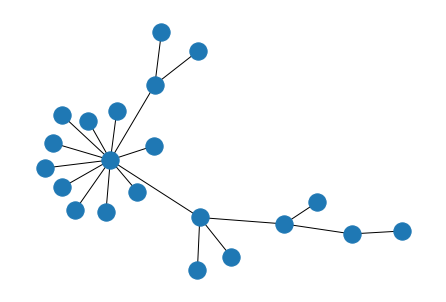

In [24]:
nx.draw(graphs[6])

In [25]:
reader

In [36]:
nx.draw_networkx(UC_99_Glist[1], nx.graphviz_layout(UC_99_Glist[1], prog='dot'))

AttributeError: module networkx has no attribute graphviz_layout

In [189]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(UC_99_Glist[0])
cluster_membership = model.get_memberships()

AssertionError: The node indexing is wrong.